# Project Objective :

This project aims to leverage customer personality analysis to achieve the following business objectives:

### 
Improve Customer Segmentatio
: By identifying distinct customer personalities within our existing customer base, we can create more targeted and effective customer segments. This will allow us to better understand the needs, preferences, and behaviors of each segmen
.### 

Enhance Marketing Campai
ns: By tailoring marketing messages and channels to resonate with specific customer personalities, we can increase campaign effectiveness and improve return on investment (R
I### ).

Optimize Product Develo
ment: By understanding the characteristics of our ideal customer for different product lines, we can focus product development efforts on features and functionalities that cater to their specific needs and de
i### res.

Personalize Customer Exp
rience: By incorporating customer personality insights across touchpoints, we can personalize the customer experience, fostering stronger customer relationships and increasing satis
a### ction.

This project's success will be mes- ured by:

Increased accuracy of customer segmentat- ion models.
Improved click-through rates and conversion rates for marketin- g campaigns.
Enhanced customer satisfa- ction scores.
Growth in sales within targeted customer segments.ustomer segments.

### Attributes

People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year 
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
- MntWines: Amount spent on wine in last 2 years 
- MntFruits : Amount spent on fruits in last 2 years
- MntMeatProducts : Amount spent on meat in last 2 years
- MntFishProducts : Amount spent on fish in last 2 years
- MntSweetProducts : Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# loading data
df = pd.read_excel(r'marketing_campaign1.xlsx')

In [3]:
# backup original data
data = df.copy()

# Data Exploration

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(2240, 29)

In [6]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [7]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

In [8]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1797   2952        1977      Master         Single  36273.0        1   
2140  10432        1974  Graduation       Divorced  19346.0        1   
1087   1509        1958         PhD       Together  84460.0        0   
943    5386        1953  Graduation       Together  94384.0        0   
185    3518        1983  Graduation        Married  25271.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1797         0  2014-04-16       80        29          3               30   
2140         0  2014-01-30       26         2          0                9   
1087         0  2013-01-04       80       152         27              103   
943          0  2013-03-04       62      1111         24              790   
185          0  2012-12-05       45        10          1               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1797                3                 2             9                  2   
2140                3                 6             2                  1   
1087              106                54            81                  0   
943               160                45           172                  0   
185                10                 4             7                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1797                3                    0                  3   
2140                1                    0                  3   
1087                9                    9                  4   
943                 5                    8                  5   
185                 1                    1                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1797                  6             0             0             0   
2140                  8             0             0             0   
1087                  5             0             1             1   
943                   2             0             1             1   
185                   9             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1797             0             0         0              3         11         0  
2140             0             0         0              3         11         0  
1087             1             1         0              3         11         1  
943              1             0         0              3         11         1  
185              0             0         0              3         11         0

## Quick Data Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

- Income feature has some missing values.

## Statistical Summary

In [10]:
df.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
AcceptedCmp3         2240.0                       0.072768   
AcceptedCmp4         2240.0                       0.074554   
AcceptedCmp5         2240.0                       0.072768   
AcceptedCmp1         2240.0                       0.064286   
AcceptedCmp2         2240.0                       0.013393   
Complain             2240.0                       0.009375   
Z_CostContact        2240.0                            3.0   
Z_Revenue            2240.0                           11.0   
Response             2240.0                       0.149107   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0              35303.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5458.5              8427.75   
Year_Birth                        1970.0               1977.0   
Income                           51381.5              68522.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 12:00:00  2013-12-30 06:00:00   
Recency  

- Year_Birth has min value is 1893 which is quite low.
- Income has min value of 1730 is a very low annual income while 6,66,666 as the max value.
- Dt_Customer reveals that we have data from 30th July 2012 to 29th June 2014.

In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- Marital_Status has 8 unique values which is quite unusual.

> # Key Insights

- We observed missing values in the Income feature.
- The earliest birth year in the data is 1893, which is quite early. It's advisable to examine these records.
- The income values range widely, with the minimum being 1730 (potentially indicating very low income) and the maximum reaching 666666.
- Dt_Customer feature indicates a data collection timeframe from July 30th, 2012, to June 29th, 2014.
- The Marital_Status feature has a surprisingly high number of unique categories (8). It might be helpful to review these categories and consider potential consolidation or recoding..

# Data Cleaning

### Identifying Duplicates
Check for duplicates and remove them if necessary.

In [12]:
df.duplicated().sum()

0

- There are no duplicate rows present in the DataFrame.

### Identifying Missing Values

In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- There are 24 missing values in the 'Income' column, and zero missing values in all other columns.

In [14]:
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    2013-11-15       11         5          5                6   
27    2013-02-20       19         5          1                3   
43    2013-11-05       80        81         11               50   
48    2014-01-01       96        48          5               48   
58    2013-06-17       57        11          3               22   
71    2012-09-14       25        25          3               43   
90    2012-11-19        4       230         42              192   
91    2014-05-27       45         7          0                8   
92    2013-11-23       87       445         37              359   
128   2013-07-11       23       352          0               27   
133   2013-08-11       96       231         65              196   
312   2013-06-03       69       861        138              461   
319   2013-08-23       67       738         20              172   
1379  2013-04-01       39       187          5               65   
1382  2012-09-03       87        19          4               12   
1383  2014-01-12       49         5          1                9   
1386  2014-03-02       17        25          1               13   
2059  2013-05-18       52       375         42               48   
2061  2013-05-31       82        23          0               15   
2078  2013-03-03       82        71          1               16   
2079  2013-06-23       83       161          0               22   
2081  2013-10-18       95       264          0               21   
2084  2013-10-30       75       532        126              490   
2228  2012-08-12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [15]:
# Calculate median income for each education level (explored but not directly used)

df.groupby('Education')['Income'].median()

Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64

In [16]:
# Create a new DataFrame 'df_missing' containing only the rows where the 'Income' column has missing values (NaN).

df_missing = df[df['Income'].isnull()]

In [17]:
# Recalculate mean income by education for imputation

income_by_education = df.groupby('Education')['Income'].median()

In [18]:
# Fill missing 'Income' values using group-based imputation

df['Income'] = data.apply(lambda row: income_by_education[row['Education']] if pd.isna(row['Income']) else row['Income'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [20]:
#Renaming columns for For clarity
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         1  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

### Univariate Analysis

Examine the distribution of each variable individually.
For numerical variables, analyze summary statistics like mean, median, min, max, and quartiles. Visualize them using histograms or boxplots.
For categorical variables (Education, Marital_Status, etc.), examine the frequency distribution using bar plots.

In [21]:
# Get features with unique values less than 10
features_less_than_10_unique_values = [feature for feature in df.columns if df[feature].nunique() < 10]
features_less_than_10_unique_values

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [22]:
## Rename education values for better understanding
df['Education'] = df['Education'].replace({'Basic': 'Primary', '2n Cycle': 'Secondary'})

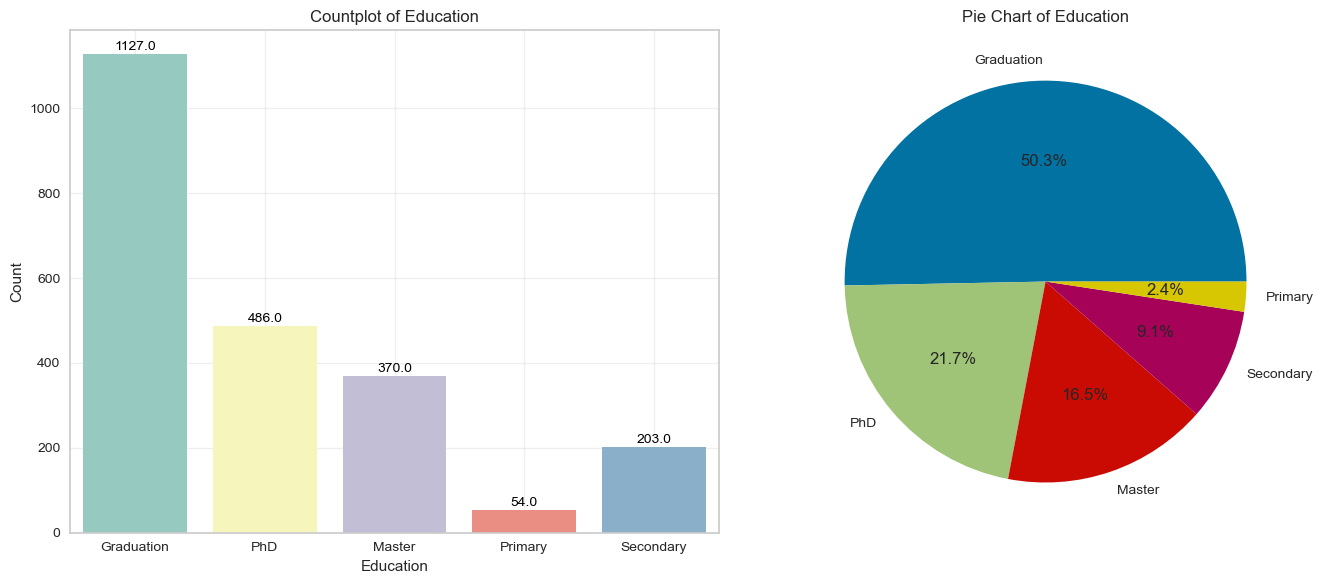

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Education", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Education')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Graduation is still the most common education level, representing approximately 50% (around 1100 people) of the total population.
- PhD holders comes in second at roughly 21% (around 600 people).
- Masters degrees account for 16.5% (around 370 people).
- Secondary education make up about 9% (around 200 people).
- Primary education is the least common with only 2.4% (around 50 people).

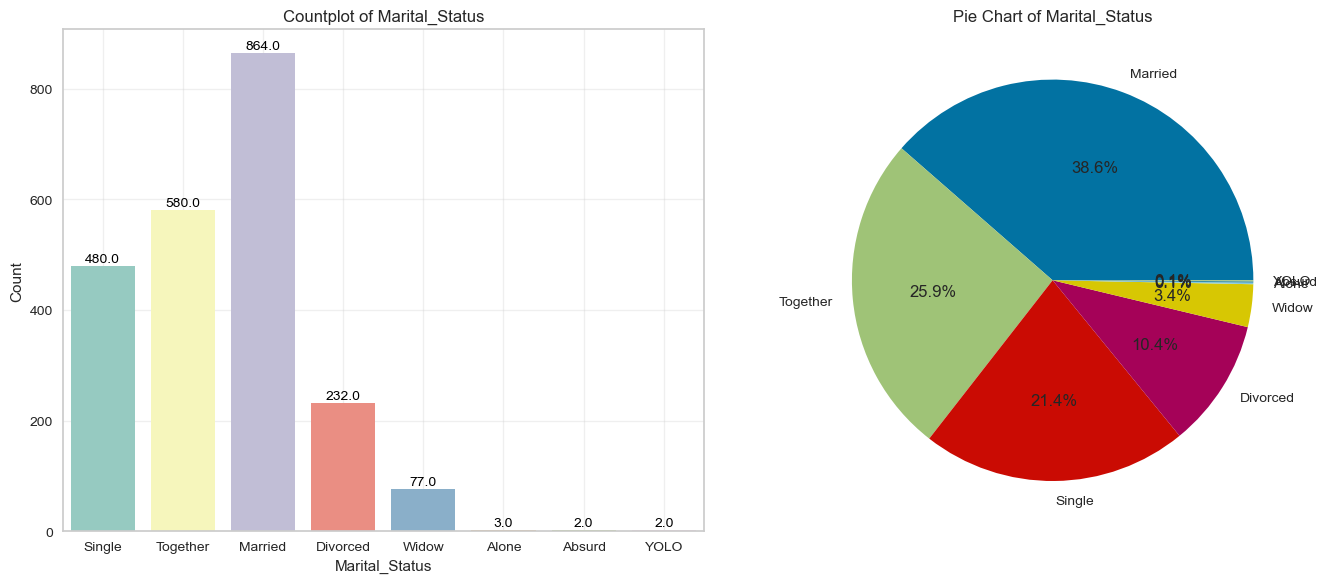

In [24]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Marital_Status", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Marital_Status')
axes[0].set_xlabel('Marital_Status')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Marital_Status')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Absurd Relationships = The relationships with our four-legged friends, or family or everything. Ritu Raj. Love with my Pets.
- YOLO = "You Only Live Once, Never Married" : a person over the age of 15 that has never been married

- Married is the most common marital status, with around 850 people. This represents approximately 38% of the total population (2240).
- Together is the second most common marital status, with around 600 people. This equates to roughly 25% of the total population.
- Single comes in third at about 480 people, which is 21% of the population.
- Divorced status is represented by around 200 people, or 10% of the total.
- The least common marital statuses are Widow (with around 80 people or 4% of the population) and others (around 10 people or less than 1%).

In [25]:
# Replace values in the "Marital_Status" column with more meaningful categories
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Married", "Together":"Married", "Single":"Single", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single",})
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         1  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

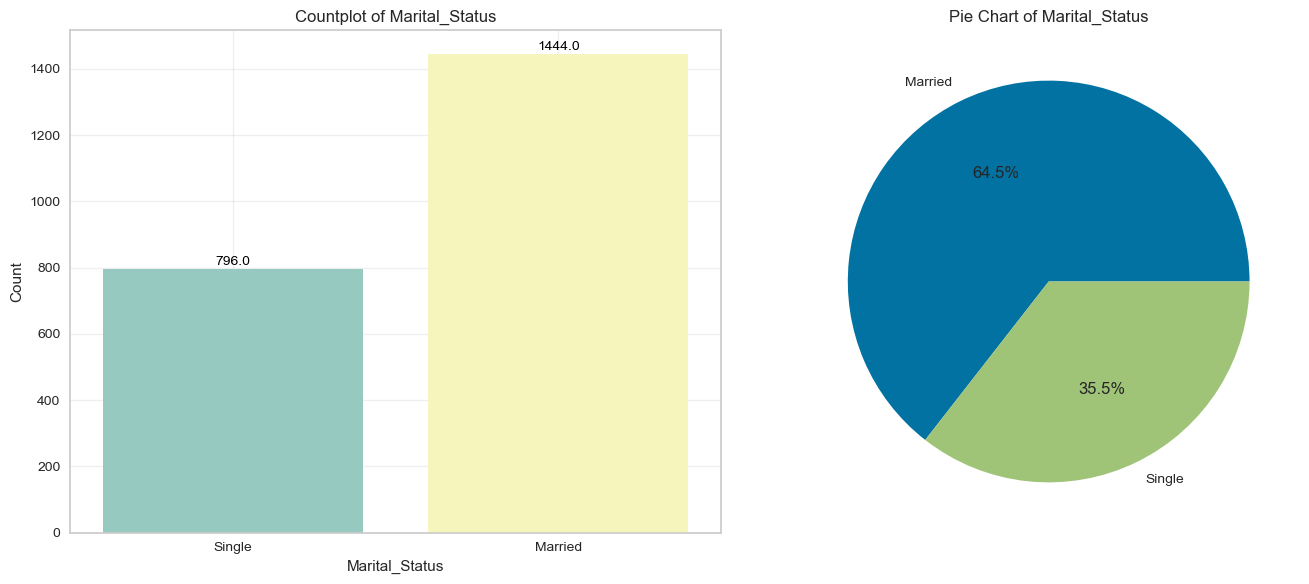

In [26]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Marital_Status", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Marital_Status')
axes[0].set_xlabel('Marital_Status')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Marital_Status')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Married is the most common marital status, with around 1400 people. This represents approximately 64.5% of the total population (2240).
- Single is the second most common marital status, with around 800 people. This equates to roughly 35.5% of the total population.

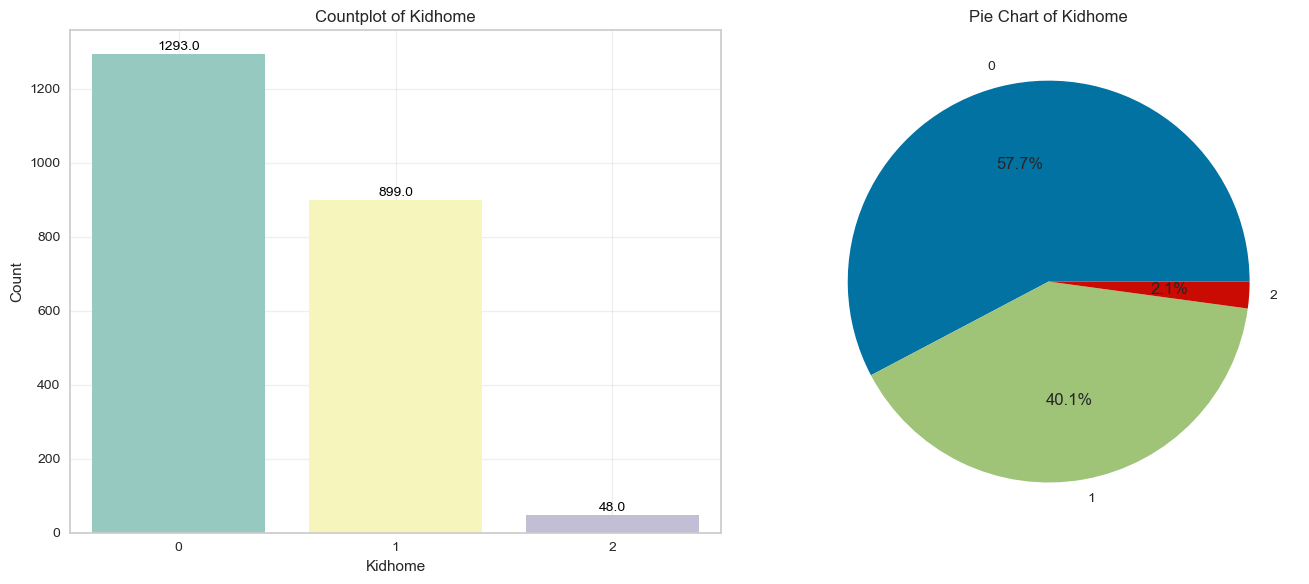

In [27]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Kidhome", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Kidhome')
axes[0].set_xlabel('Kidhome')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Kidhome'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Kidhome')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The majority of people (around 1200) in the dataset do not have children at home. This represents over 57% of the total population (2240).
- Around 900 people (roughly 40% of the population) have one child at home.
- About 50 people (around 2% of the population) have two children at home.

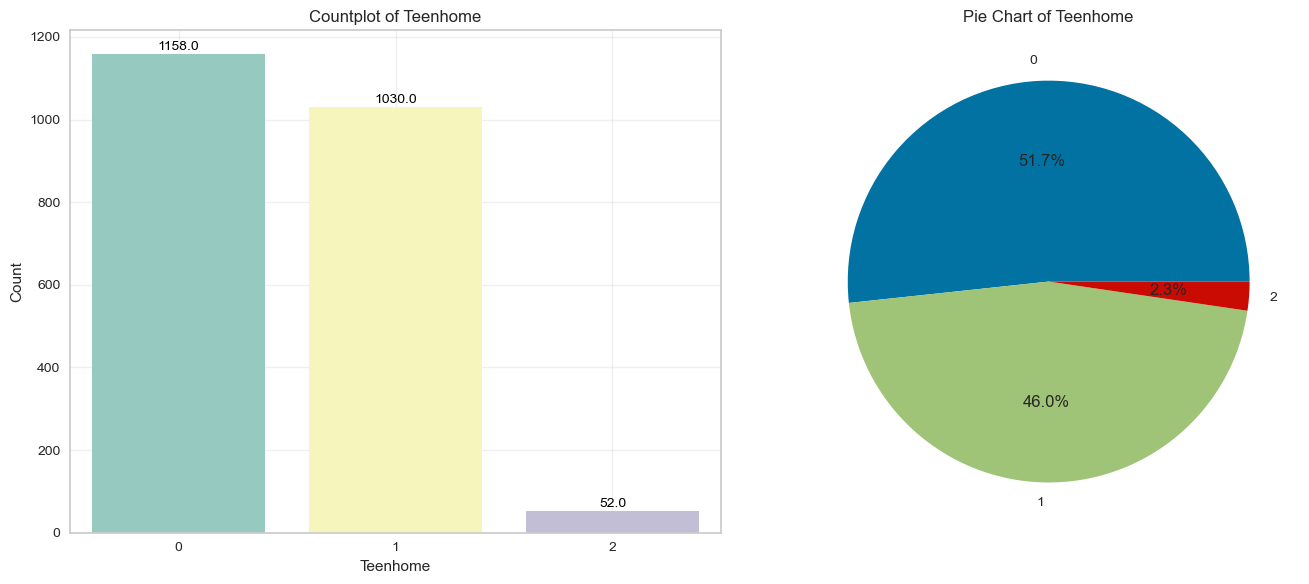

In [28]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Teenhome", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Teenhome')
axes[0].set_xlabel('Teenhome')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Teenhome'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Teenhome')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The majority of people (around 1100) in the dataset do not have teenagers at home. This represents over 50% of the total population (2240).
- Around 1000 people (roughly 46% of the population) have one teenager at home.
- Very few people have two or more teenagers at home. The chart shows less than 50 people for these categories combined, which is less than 3% of the population.

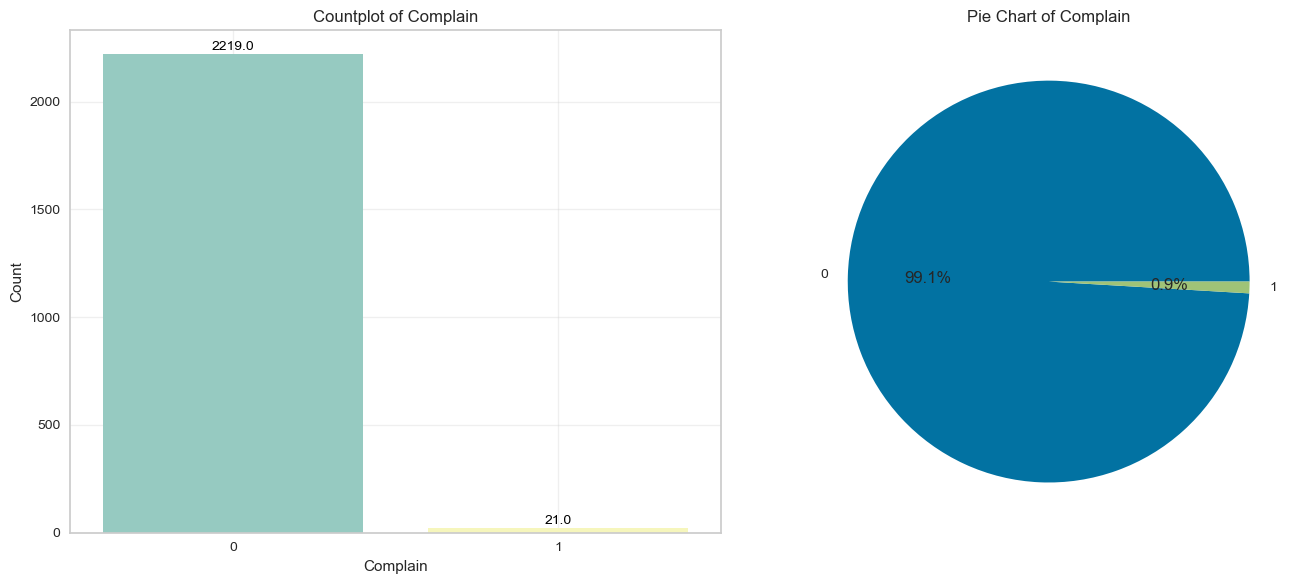

In [29]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Complain", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Complain')
axes[0].set_xlabel('Complain')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Complain'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Complain')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The vast majority of customers (around 2220 people, or 99.1%) have not registered a complaint.
- A very small number of customers (around 20 people, or 0.9%) have registered a complaint.

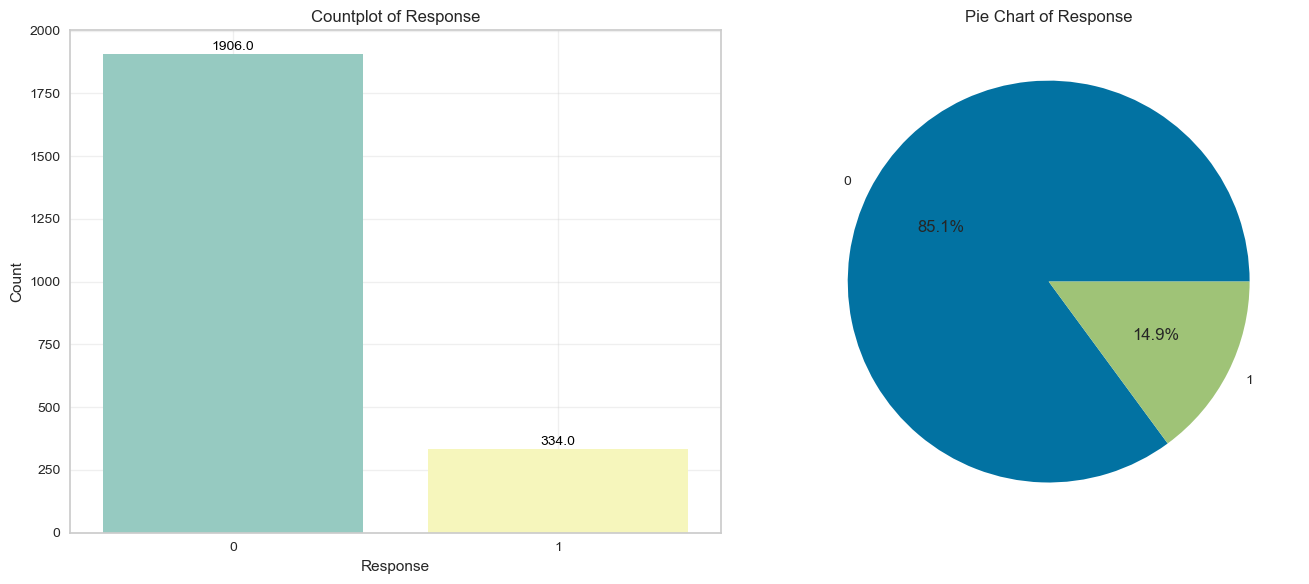

In [30]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Response", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Response')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Response')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- A large portion of customers (around 1900 people, or 85.1%) did not respond to the campaign.
- A smaller portion of customers (around 340 people, or 14.9%) responded to the campaign.

## Bivariate Analysis
Explore relationships between pairs of variables.

For numerical vs. numerical variables, we can use scatter plots to see if there's any correlation

For categorical vs. categorical variables, we can use contingency tables or stacked bar plots to observe the relationshi
.
For categorical vs. numerical variables, we can use boxplots or violin plots to see the distribution of the numerical variable across different categories.

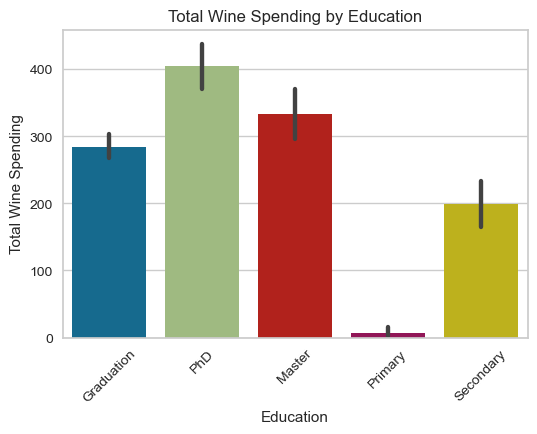

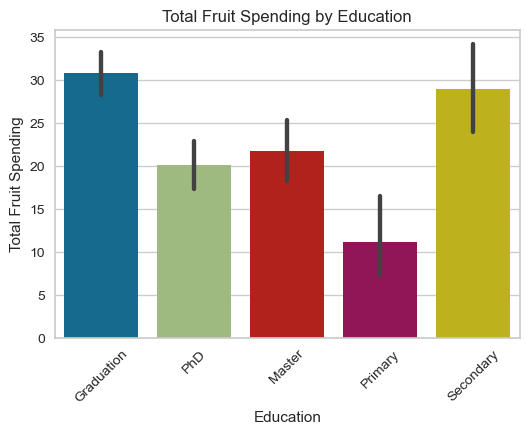

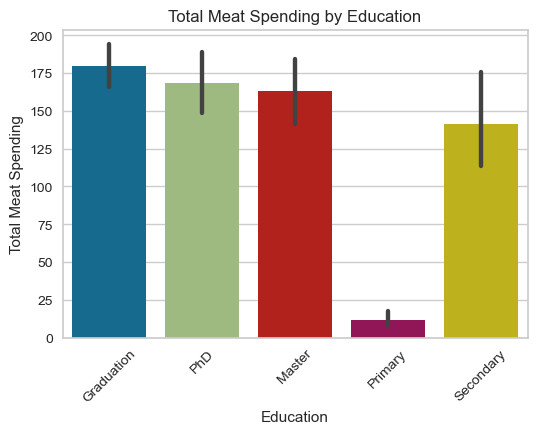

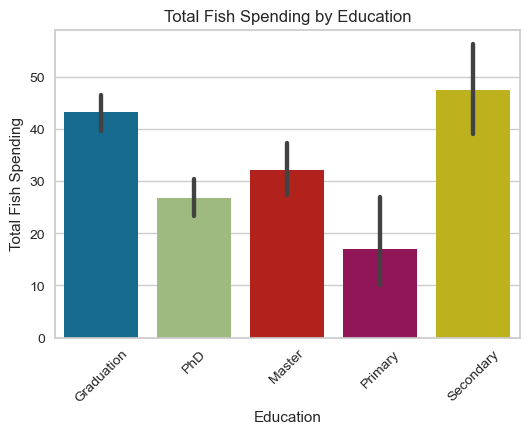

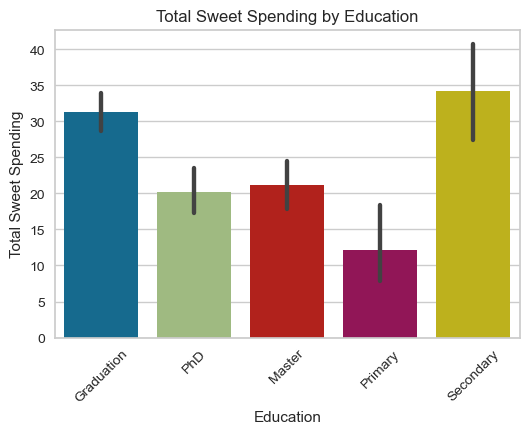

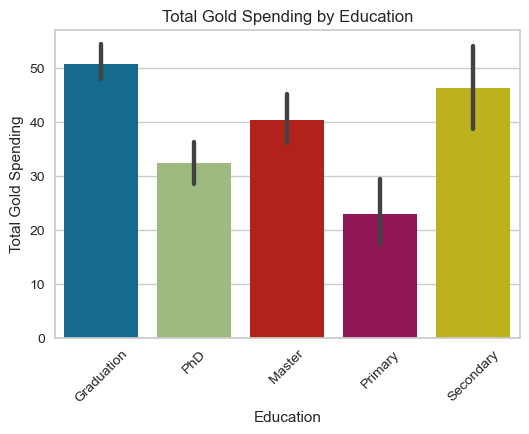

In [31]:
# Bivariate analysis on spending on different items and Education
plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Wines', data=df)
plt.xlabel('Education')
plt.ylabel('Total Wine Spending')
plt.title('Total Wine Spending by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Fruits', data=df)
plt.xlabel('Education')
plt.ylabel('Total Fruit Spending')
plt.title('Total Fruit Spending by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Meat', data=df)
plt.xlabel('Education')
plt.ylabel('Total Meat Spending')
plt.title('Total Meat Spending by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Fish', data=df)
plt.xlabel('Education')
plt.ylabel('Total Fish Spending')
plt.title('Total Fish Spending by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Sweets', data=df)
plt.xlabel('Education')
plt.ylabel('Total Sweet Spending')
plt.title('Total Sweet Spending by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Gold', data=df)
plt.xlabel('Education')
plt.ylabel('Total Gold Spending')
plt.title('Total Gold Spending by Education')
plt.xticks(rotation=45)
plt.show()

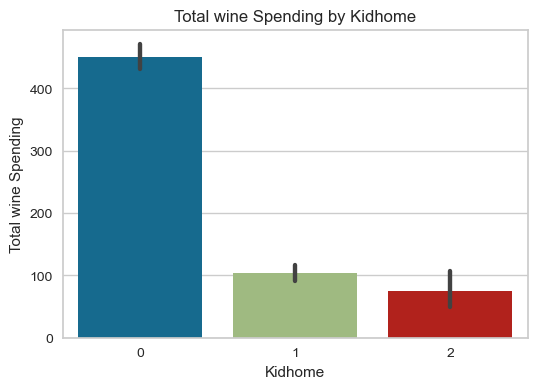

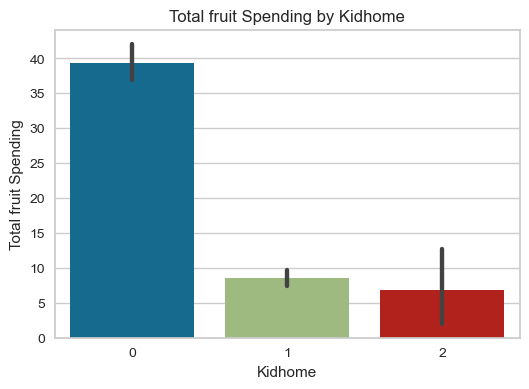

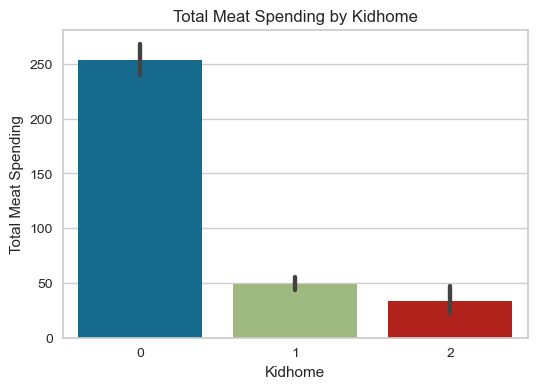

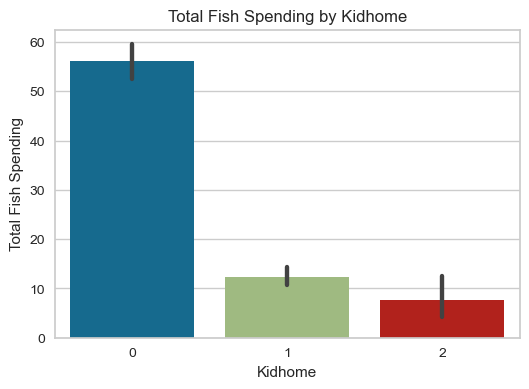

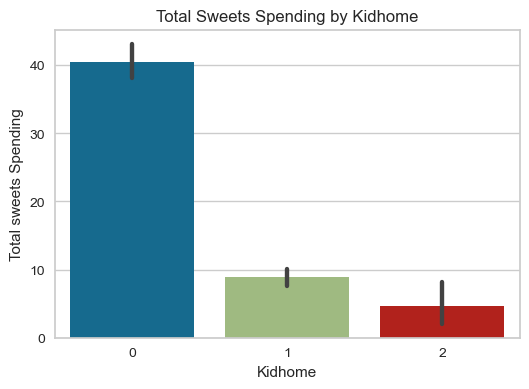

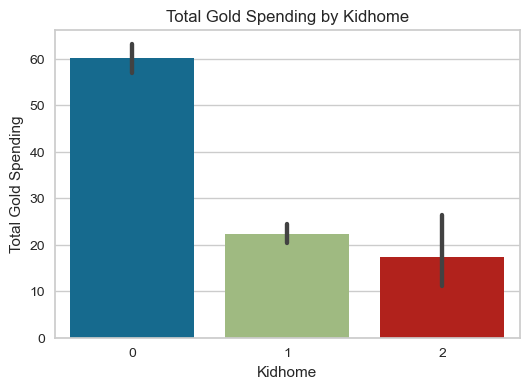

In [32]:
# Bivariate analysis on spending on different items and Kidhome
plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Wines', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total wine Spending')
plt.title('Total wine Spending by Kidhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Fruits', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total fruit Spending')
plt.title('Total fruit Spending by Kidhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Meat', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total Meat Spending')
plt.title('Total Meat Spending by Kidhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Fish', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total Fish Spending')
plt.title('Total Fish Spending by Kidhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Sweets', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total sweets Spending')
plt.title('Total Sweets Spending by Kidhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Kidhome', y='Gold', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Total Gold Spending')
plt.title('Total Gold Spending by Kidhome')
plt.show()

In [33]:
correlation = df['Kidhome'].corr(df['Wines'])
print("Correlation between Kids at home and Amount spent on Wines:", correlation)

correlation = df['Kidhome'].corr(df['Fruits'])
print("Correlation between Kids at home and Amount spent on Fruits:", correlation)

correlation = df['Kidhome'].corr(df['Meat'])
print("Correlation between Kids at home and Amount spent on Meat Products:", correlation)

correlation = df['Kidhome'].corr(df['Fish'])
print("Correlation between Kids at home and Amount spent on Fish Products:", correlation)

correlation = df['Kidhome'].corr(df['Sweets'])
print("Correlation between Kids at home and Amount spent on Products:", correlation)

correlation = df['Kidhome'].corr(df['Gold'])
print("Correlation between Kids at home and Amount spent on Gold:", correlation)

Correlation between Kids at home and Amount spent on Wines: -0.4962969267579847
Correlation between Kids at home and Amount spent on Fruits: -0.372581451087385
Correlation between Kids at home and Amount spent on Meat Products: -0.4371294823547504
Correlation between Kids at home and Amount spent on Fish Products: -0.38764395685089126
Correlation between Kids at home and Amount spent on Products: -0.3706730311508134
Correlation between Kids at home and Amount spent on Gold: -0.3495945982454767


- There is a higher negative correlation between Kidhome and Amount spend on wines

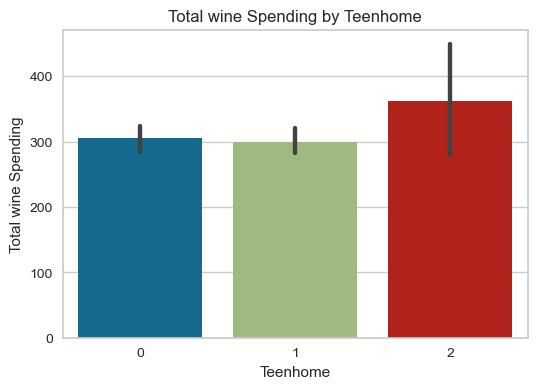

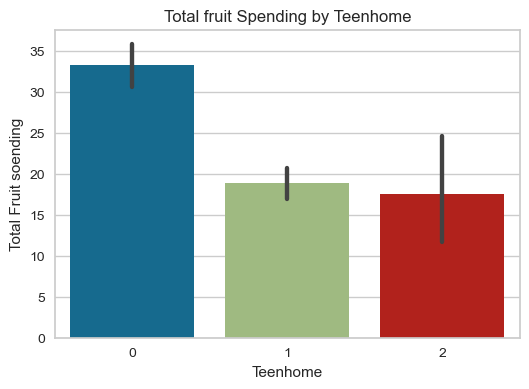

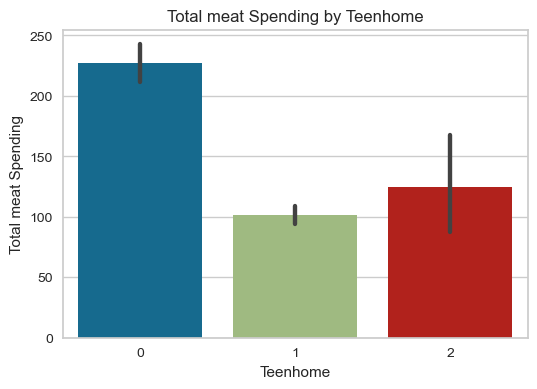

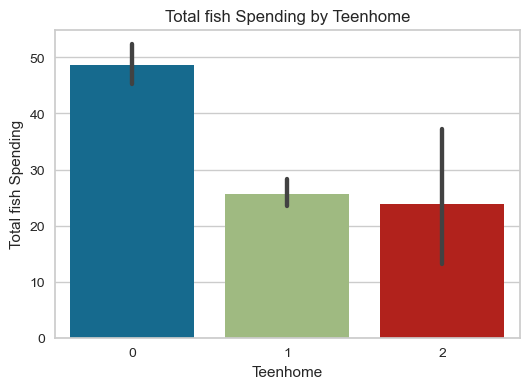

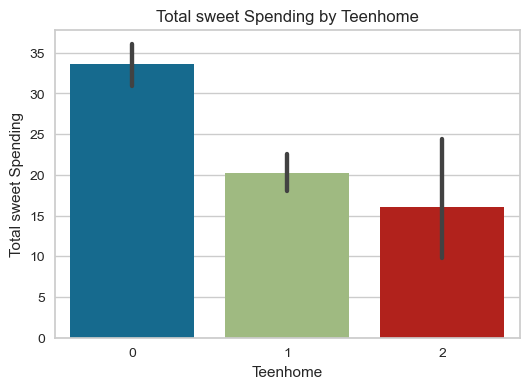

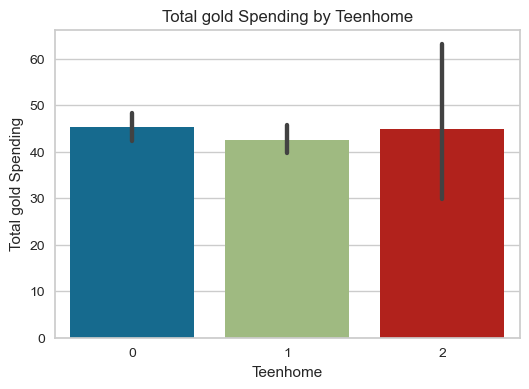

In [34]:
# Bivariate analysis on spending on different items and Teenhome
plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Wines', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total wine Spending')
plt.title('Total wine Spending by Teenhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Fruits', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total Fruit soending')
plt.title('Total fruit Spending by Teenhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Meat', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total meat Spending')
plt.title('Total meat Spending by Teenhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Fish', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total fish Spending')
plt.title('Total fish Spending by Teenhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Sweets', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total sweet Spending')
plt.title('Total sweet Spending by Teenhome')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Teenhome', y='Gold', data=df)
plt.xlabel('Teenhome')
plt.ylabel('Total gold Spending')
plt.title('Total gold Spending by Teenhome')
plt.show()

In [35]:
correlation = df['Teenhome'].corr(df['Wines'])
print("Correlation between Teen at Home and amount spent on Wines:", correlation)

correlation = df['Teenhome'].corr(df['Fruits'])
print("Correlation between Teen at Home and amount spent on Fruits:", correlation)

correlation = df['Teenhome'].corr(df['Meat'])
print("Correlation between Teen at Home and amount spent on Meat:", correlation)

correlation = df['Teenhome'].corr(df['Fish'])
print("Correlation between Teen at Home and amount spent on Fish:", correlation)

correlation = df['Teenhome'].corr(df['Sweets'])
print("Correlation between Teen at Home and amount spent on Sweet:", correlation)

correlation = df['Teenhome'].corr(df['Gold'])
print("Correlation between Teen at Home and amount spent on Gold:", correlation)

Correlation between Teen at Home and amount spent on Wines: 0.004846405297905839
Correlation between Teen at Home and amount spent on Fruits: -0.17676366189321108
Correlation between Teen at Home and amount spent on Meat: -0.26115951301530016
Correlation between Teen at Home and amount spent on Fish: -0.20418731644604157
Correlation between Teen at Home and amount spent on Sweet: -0.16247511144846663
Correlation between Teen at Home and amount spent on Gold: -0.021725269220787442


- There is almost no correlation between Teenhome and Wine, Gold products
- All other products have slightly negative correlation with teenhome

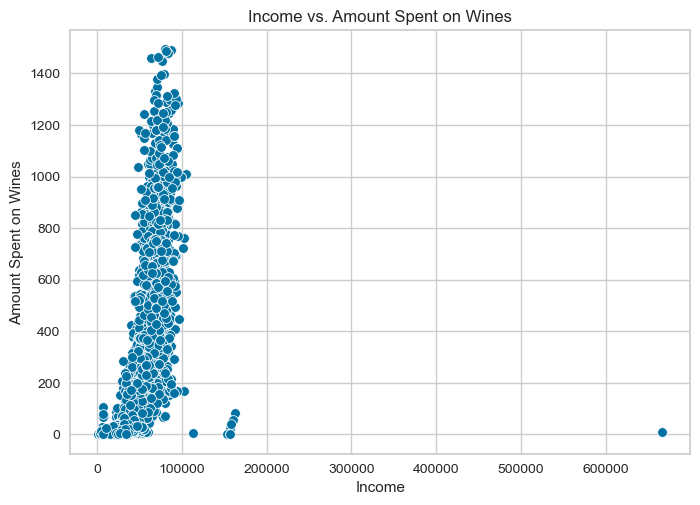

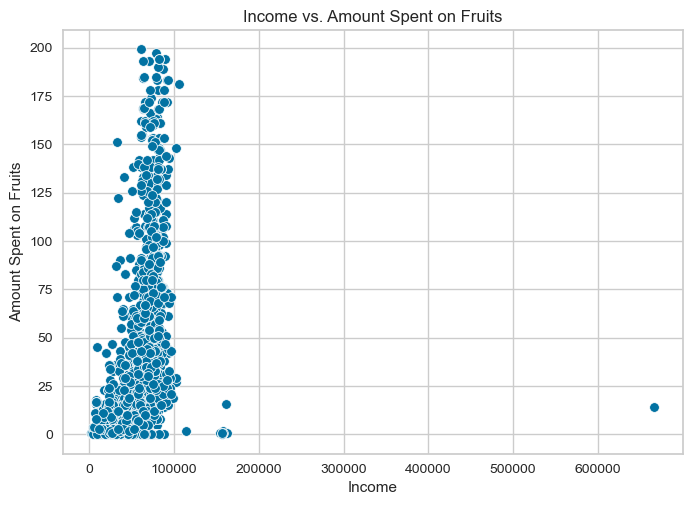

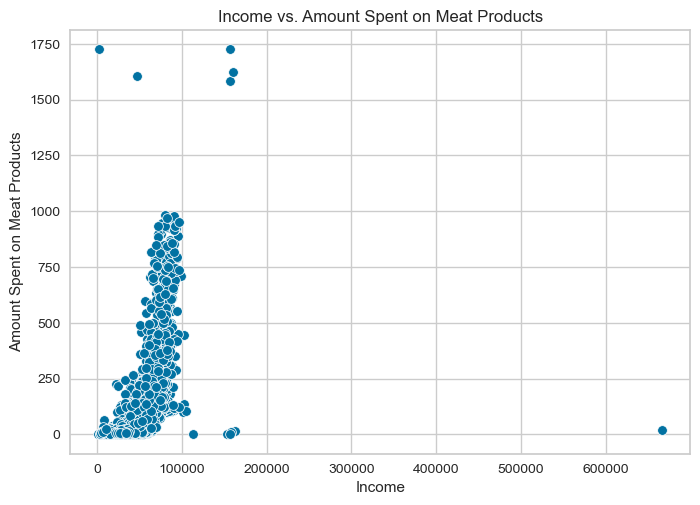

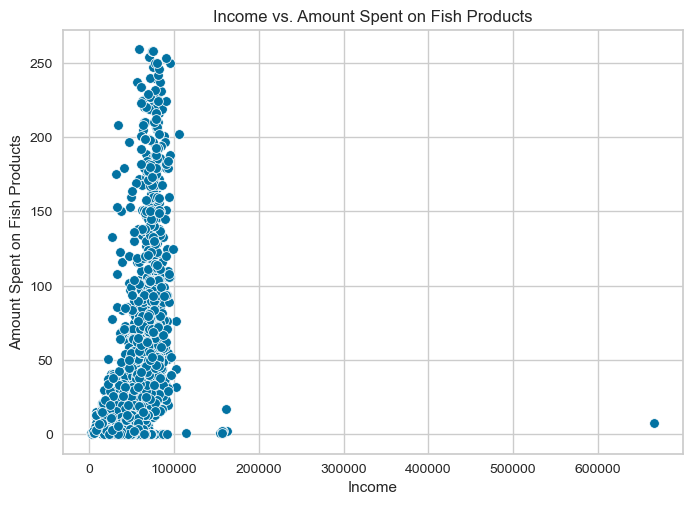

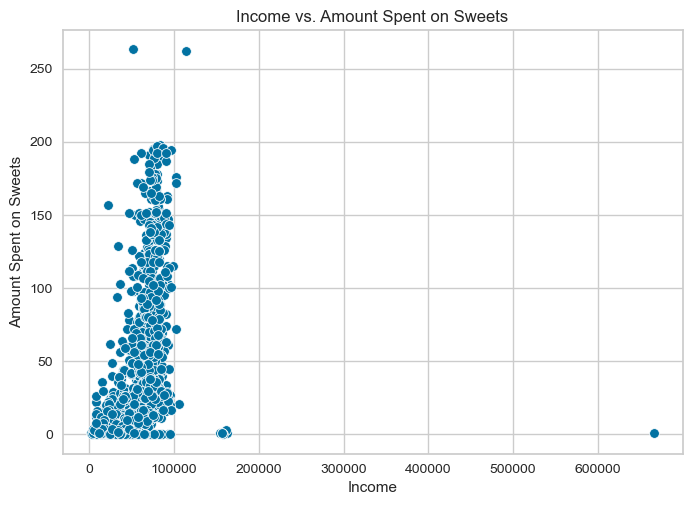

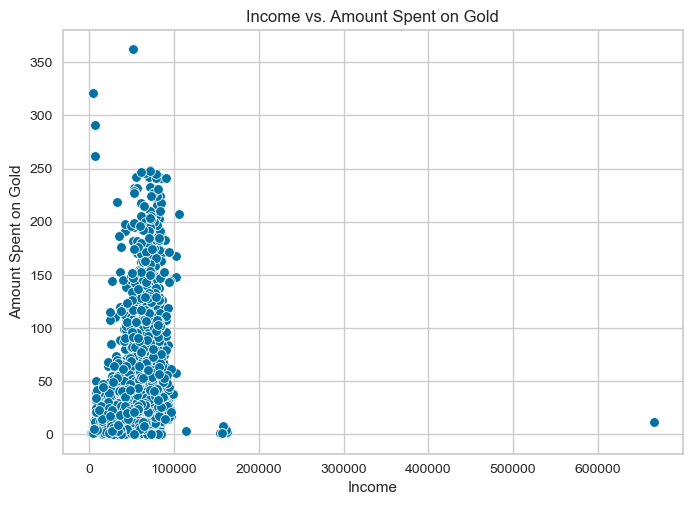

In [36]:
# Bivariate analysis on spending on different items and Income
sns.scatterplot(x='Income', y='Wines', data=df)
plt.title('Income vs. Amount Spent on Wines')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wines')
plt.show()

sns.scatterplot(x='Income', y='Fruits', data=df)
plt.title('Income vs. Amount Spent on Fruits')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Fruits')
plt.show()

sns.scatterplot(x='Income', y='Meat', data=df)
plt.title('Income vs. Amount Spent on Meat Products')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Meat Products')
plt.show()

sns.scatterplot(x='Income', y='Fish', data=df)
plt.title('Income vs. Amount Spent on Fish Products')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Fish Products')
plt.show()

sns.scatterplot(x='Income', y='Sweets', data=df)
plt.title('Income vs. Amount Spent on Sweets')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Sweets')
plt.show()

sns.scatterplot(x='Income', y='Gold', data=df)
plt.title('Income vs. Amount Spent on Gold')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Gold')
plt.show()

In [37]:
correlation = df['Income'].corr(df['Wines'])
print("Correlation between Income and amount spend on Wines:", correlation)

correlation = df['Income'].corr(df['Fruits'])
print("Correlation between Income and amount spend on Fruits:", correlation)

correlation = df['Income'].corr(df['Meat'])
print("Correlation between Income and amount spend on Meat Products:", correlation)

correlation = df['Income'].corr(df['Fish'])
print("Correlation between Income and amount spend on Fish Products:", correlation)

correlation = df['Income'].corr(df['Sweets'])
print("Correlation between Income and amount spend on Sweet Products:", correlation)

correlation = df['Income'].corr(df['Gold'])
print("Correlation between Income and amount spend on Gold:", correlation)

Correlation between Income and amount spend on Wines: 0.5768782102082942
Correlation between Income and amount spend on Fruits: 0.4287589968270913
Correlation between Income and amount spend on Meat Products: 0.5771485713247573
Correlation between Income and amount spend on Fish Products: 0.43743184813494146
Correlation between Income and amount spend on Sweet Products: 0.43611878467607607
Correlation between Income and amount spend on Gold: 0.3219772284304577


- There is a higher positive correlation between Income and Money spent in wine 
- There is a higher positive correlation between Income and Money spent in meat products 

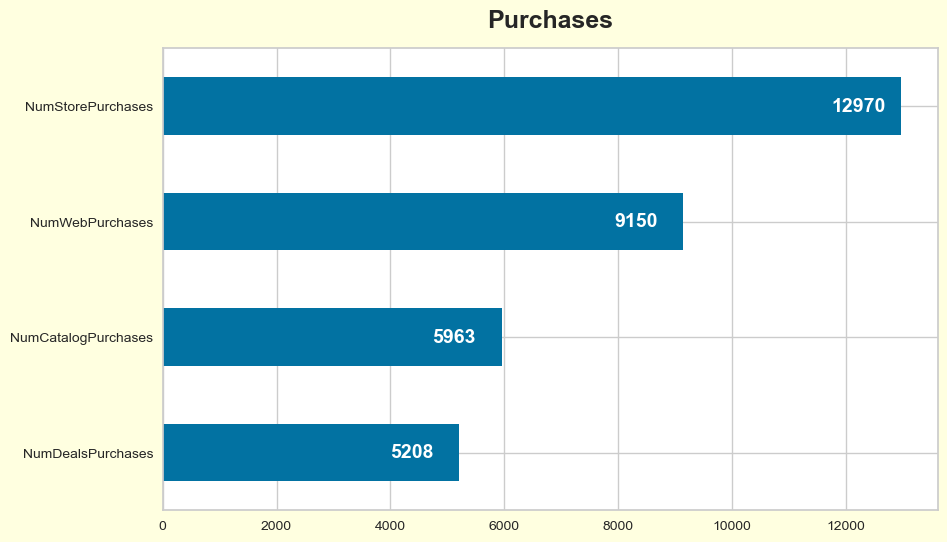

In [38]:
plt.figure(figsize=(10,6), facecolor='lightyellow')

ax = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

- Most people tend to make purchases through the store

## Multivariate Analysis

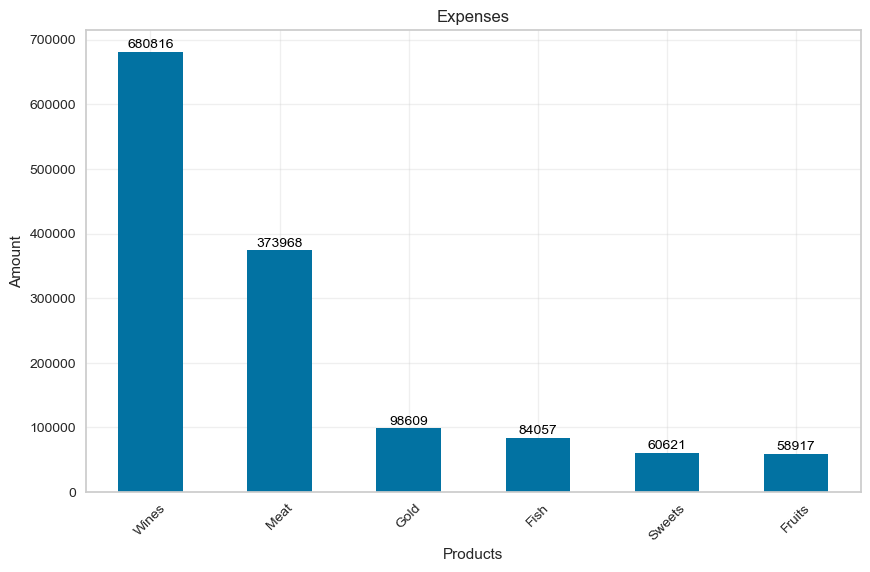

In [39]:
# Define data
expenses = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum().sort_values(ascending=False)

# Plot bar chart
ax = expenses.plot(kind='bar', figsize=(10, 6))

# Add total count inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and axis labels
plt.title('Expenses')
plt.xlabel('Products')
plt.ylabel('Amount')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Show plot
plt.show()

- Wines is the most popular product category, with customers spending over $700,000.
- Meat comes in second at around $375,000.
- Gold is the third most popular product category, with spending exceeding $98,000.
- Fish and Sweets follow closely behind, with total spending around $840,000 and $60,000 respectively.
- Fruits is the least popular category, with a total spend of around $58,000.

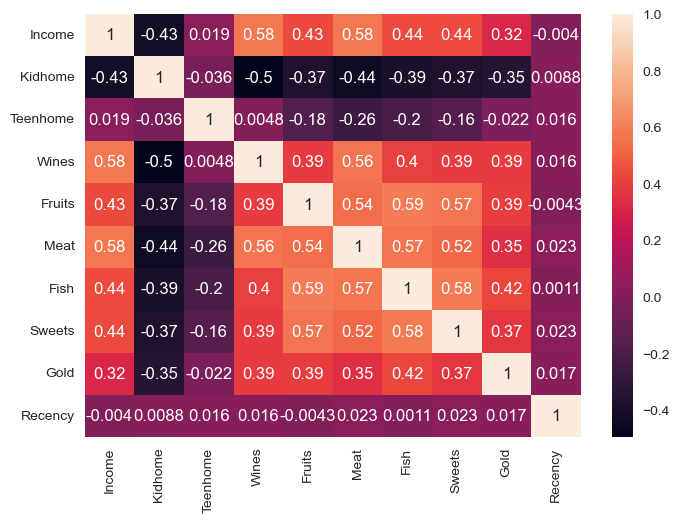

In [40]:
sns.heatmap(df[['Income', 'Kidhome', 'Teenhome', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Recency']].corr(), annot=True);

## Outlier Detection
Identify and analyze outliers, especially in numerical variables.

Decide whether to keep or remove outliers based on domain knowledge and the context of the analysis.

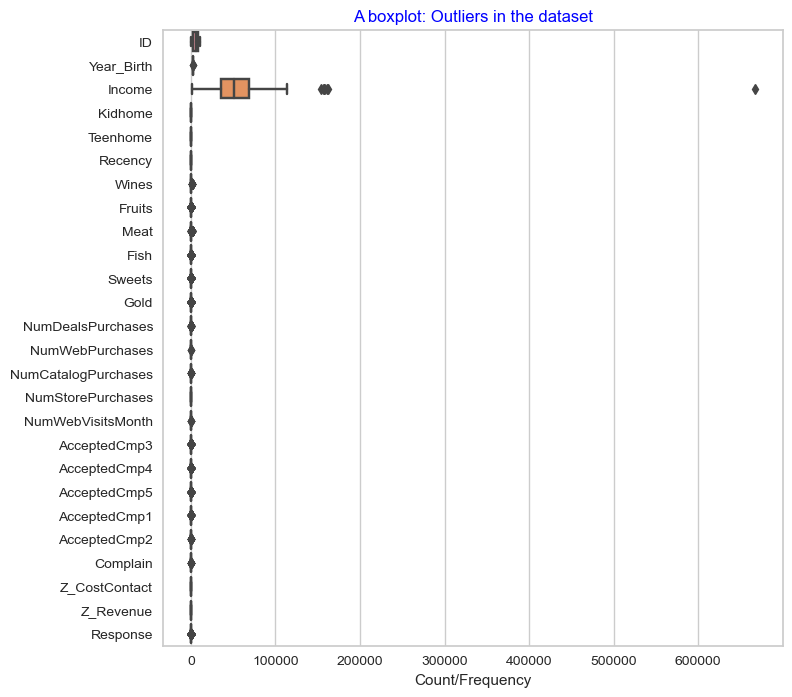

In [41]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show();

In [42]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the rows containing outliers in the 'Income' feature
outliers_df = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Display the modified DataFrame
outliers_df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income']]

ID  Year_Birth   Education Marital_Status    Income
164    8475        1973         PhD        Married  157243.0
617    1503        1976         PhD        Married  162397.0
655    5555        1975  Graduation         Single  153924.0
687    1501        1982         PhD        Married  160803.0
1300   5336        1971      Master        Married  157733.0
1653   4931        1977  Graduation        Married  157146.0
2132  11181        1949         PhD        Married  156924.0
2233   9432        1977  Graduation        Married  666666.0

In [43]:
# Calculate the mean income for each education group
education_mean_income = df.groupby('Education')['Income'].transform('mean')

# Replace outliers with the group mean
df.loc[(df['Income'] < lower_bound) | (df['Income'] > upper_bound), 'Income'] = education_mean_income

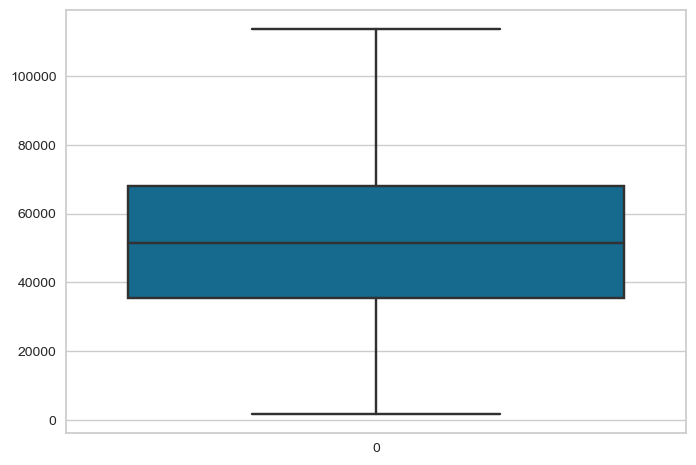

In [44]:
sns.boxplot(data=df['Income'], orient="v");

# Feature Engineering

Derive new features from existing ones if necessary.

- Age of Customers
- Number of children combined Kids and Teens
- Total number of family members (Family Size)
- Total amount spent
- Expense Ration
- Accepted deal campaign number
- Total Deal purchase

In [45]:
#Age of customer as per the max value of Date of customer's enrollment with the company which is 2014.
df["Age"] = 2014 - df["Year_Birth"]
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  
0             0         0              3         11         1   57  
1             0         0              3         11         0   60  
2             0         0              3         11         0   49  
3             0         0              3         11         0   30  
4             0         0              3         11         0   33

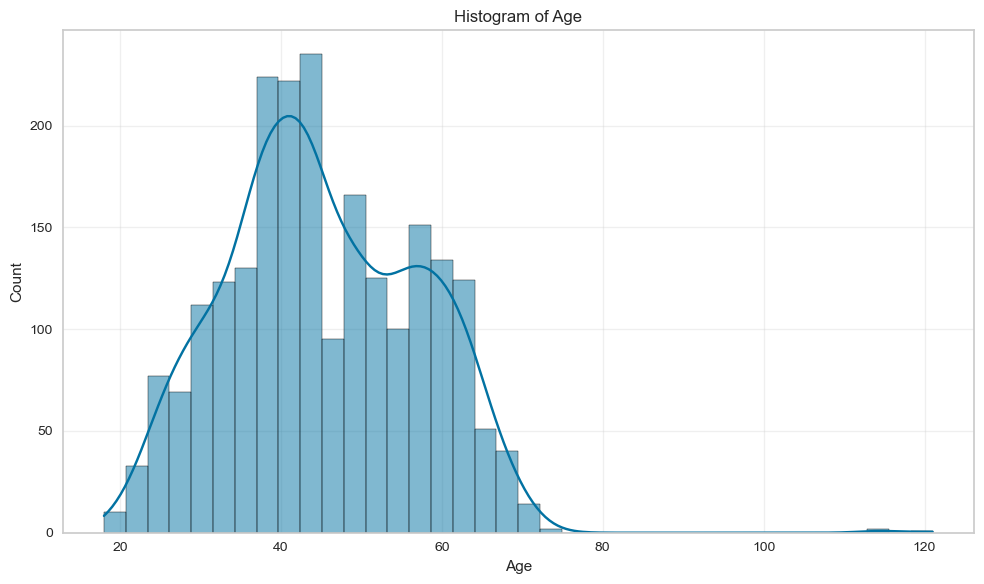

In [46]:
# Create histplot
plt.figure(figsize=(10, 6))
sns.histplot(x="Age", data=df, kde=True)
plt.grid(alpha=0.3)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The distribution appears to be right-skewed, meaning there are more younger individuals than older ones.
- The right skew might indicate that the store caters more towards younger or middle-aged adults.
- There is a peak (mode) around a younger or middle-aged adult range.
- The specific age range at the peak (mode) could be a target demographic for the store's products or services.

In [47]:
# This represents the total count of children in the household by combining the counts of kids and teens.
df["Children"] = df["Kidhome"] + df["Teenhome"]
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  
0             0         0              3         11         1   57         0  
1             0         0              3         11         0   60         2  
2             0         0              3         11         0   49         0  
3             0         0              3         11         0   30         1  
4             0         0              3         11         0   33         1

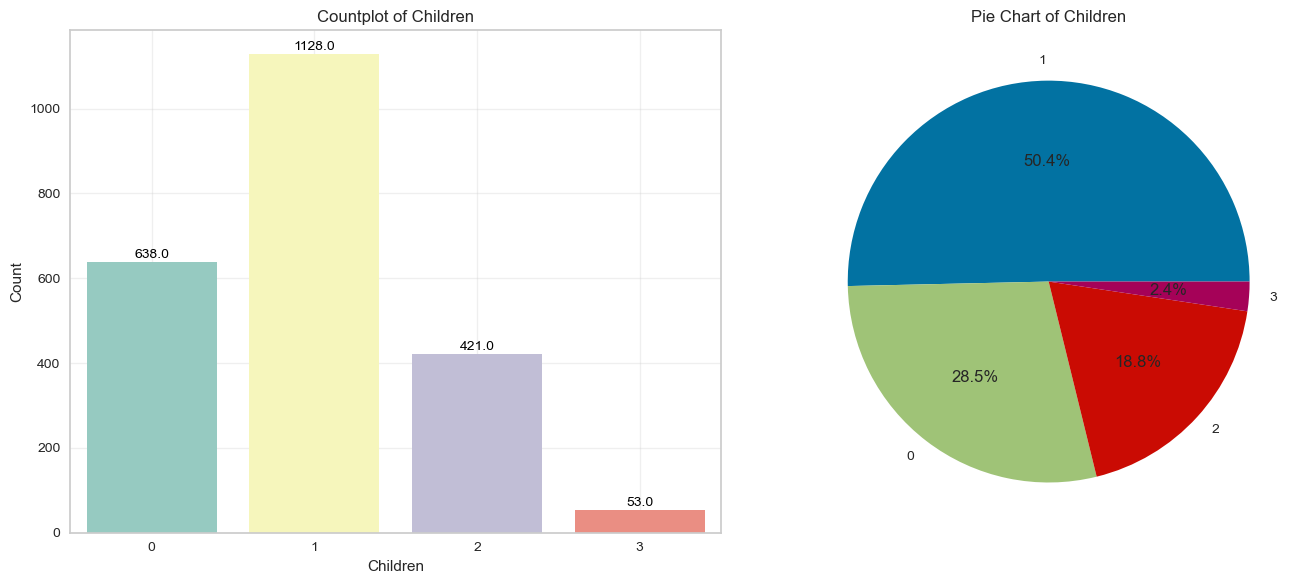

In [48]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Children", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Children')
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Children'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Children')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The majority of people (around 1100) in the dataset have one child at home. This represents over 50% of the total population (2240).
- Around 650 people (roughly 28% of the population) do not have children at home.
- About 400 people (around 19% of the population) have two children at home.
- There are a relatively smaller number of people with three or more children at home. The chart shows less than 60 people for these categories combined, which is around 2.5% of the population.

In [49]:
# If Marital_Status is single, set family_members to 1, otherwise 2
df['Family_Members'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Single' else 2)

# Add Children column to family_members
df['Family_Members'] += df['Children']
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  
0               1  
1               3  
2               2  
3               3  
4               3

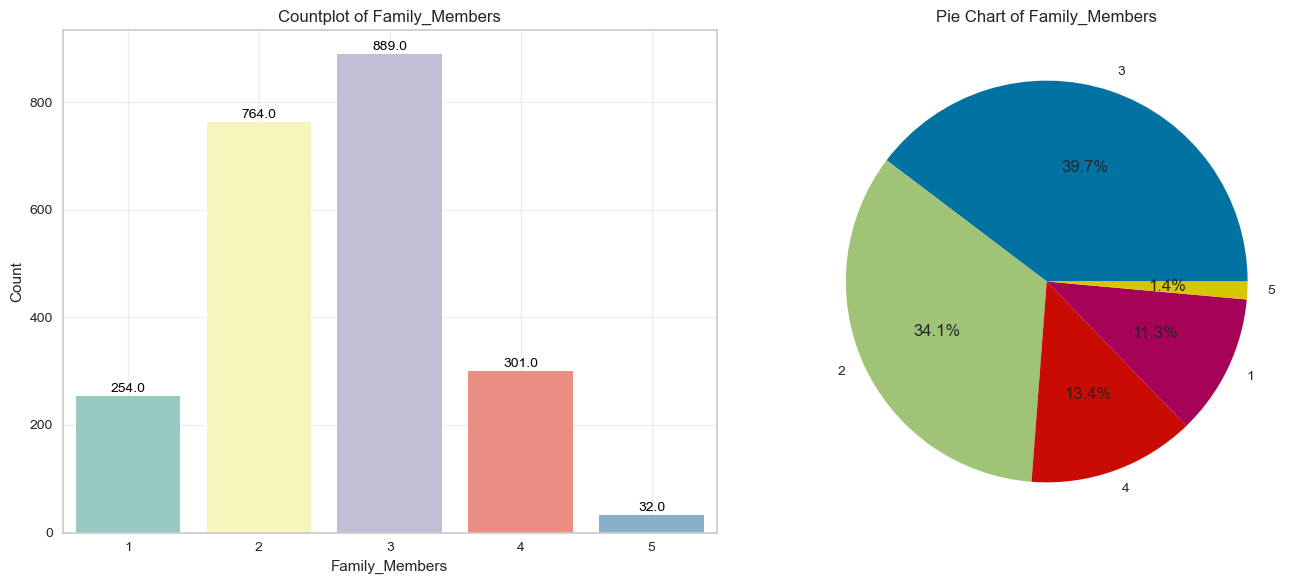

In [50]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Family_Members", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Family_Members')
axes[0].set_xlabel('Family_Members')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['Family_Members'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Family_Members')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- The most common family size is 3, with around 900 people, which represents over 40% of the total population (2240). This suggests a large portion of married-person households.
- There are around 750 people (roughly 35% of the population) with families of size 2.
- Families of size 4 and 5 are less frequent, with around 350 people (around 15% of the population) each.
- There are single households are around 250 people, which represent over 11% of the total population.

In [51]:
#Total spending on various items
df["Spending"] = df["Wines"] + df["Fruits"] + df["Meat"] + df["Fish"] + df["Sweets"] + df["Gold"]
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  Spending  
0               1      1617  
1               3        27  
2               2       776  
3               3        53  
4               3       422

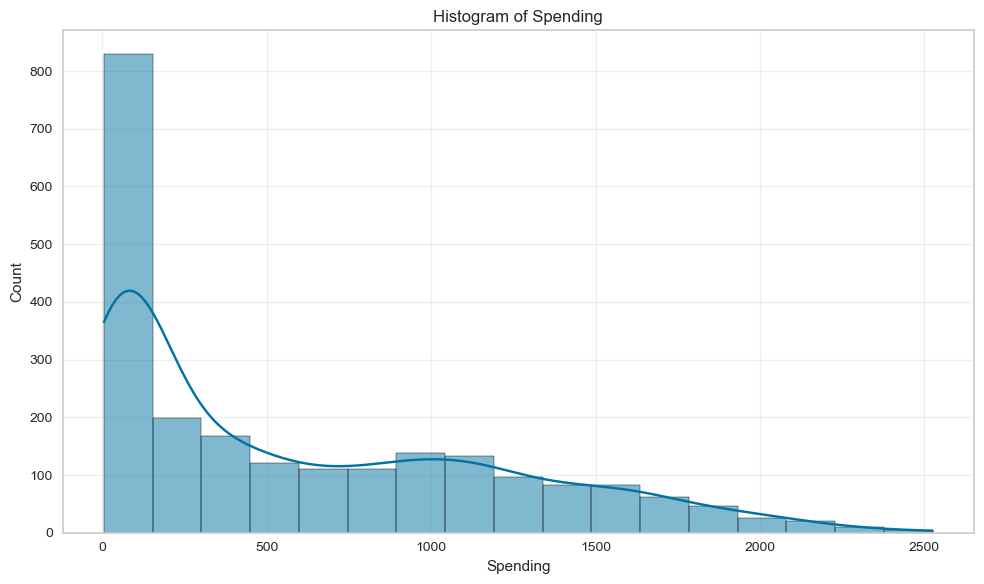

In [52]:
# Create histplot
plt.figure(figsize=(10, 6))
sns.histplot(x="Spending", data=df, kde=True)
plt.grid(alpha=0.3)
plt.title('Histogram of Spending')
plt.xlabel('Spending')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The most common spending amount is below $$500. There are around 800 people who spend in this range.
- The number of customers spending significantly less or more than $$500-$1000 drops off considerably.
- There are around 300 people who spend between $$500 and $1000.
- There are around 400 people who spend between $$1000 and $1500.
- Even fewer customers spend more than $$1500. There are around 100 people who spend between $1500 and $2000, and less than 100 people who spend more than $2000.

In [53]:
# Create a new column indicating in which campaign the offer was accepted by customer.
df['AcceptedCmpNo'] = df.apply(lambda row: 1 if row['AcceptedCmp1'] == 1
                                  else 2 if row['AcceptedCmp2'] == 1
                                  else 3 if row['AcceptedCmp3'] == 1
                                  else 4 if row['AcceptedCmp4'] == 1
                                  else 5 if row['AcceptedCmp5'] == 1
                                  else 0, axis=1)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  Spending  AcceptedCmpNo  
0               1      1617              0  
1               3        27              0  
2               2       776              0  
3               3        53              0  
4               3       422              0

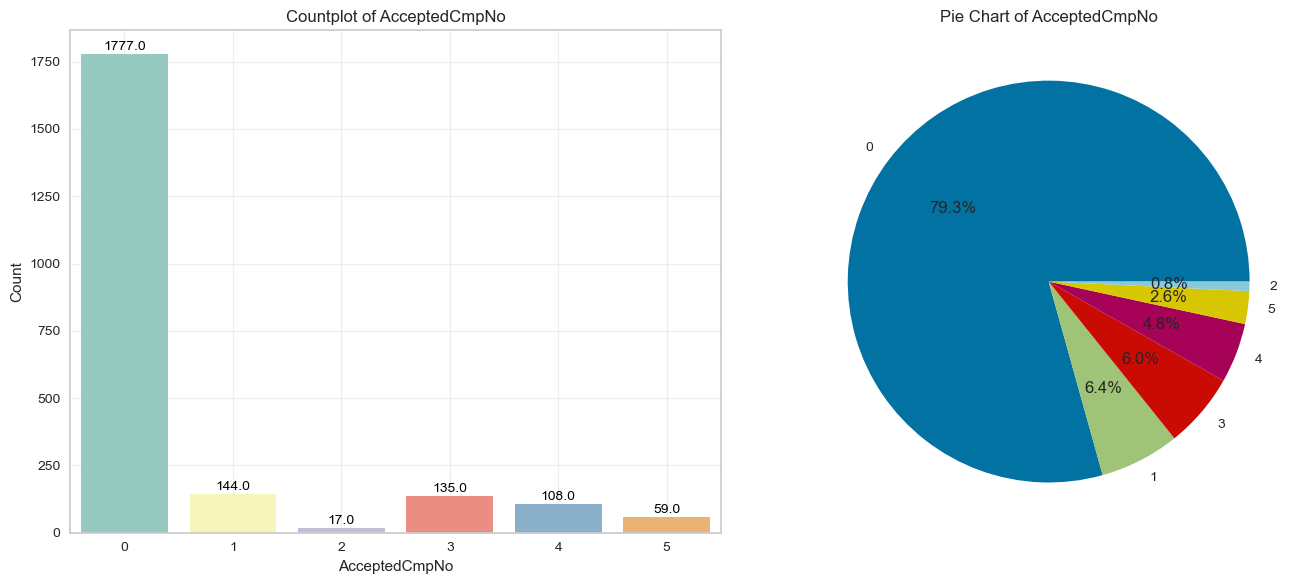

In [54]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="AcceptedCmpNo", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of AcceptedCmpNo')
axes[0].set_xlabel('AcceptedCmpNo')
axes[0].set_ylabel('Count')

# Add total count inside each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Create pie chart
df['AcceptedCmpNo'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of AcceptedCmpNo')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Most customers do not accept the deal on any of the campaigns. This is because the first bar (labeled "0") in each campaign is the tallest, representing the most people.
- There is a significant drop-off in the number of customers who accept the deal with each subsequent attempt. For example, in Campaign 1, over 145 people accepted the deal (represented by the bar labeled "1"), whereas only around 20 people accepted the deal on the second attempt (represented by the bar labeled "2").

In [55]:
df['TotalDeal_Purchase'] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  Spending  AcceptedCmpNo  TotalDeal_Purchase  
0               1      1617              0                  25  
1               3        27              0                   6  
2               2       776              0                  21  
3               3        53              0                   8  
4               3       422              0                  19

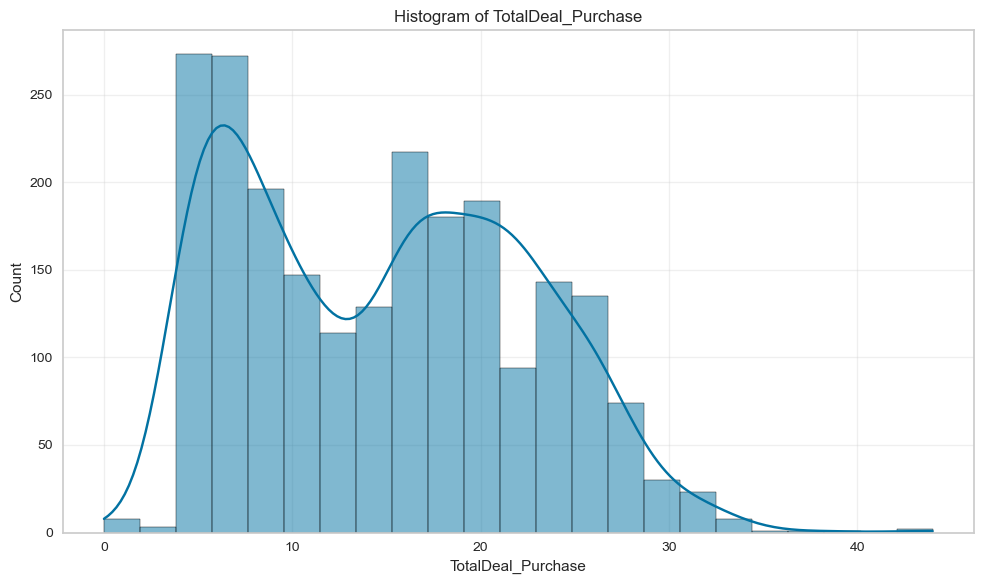

In [56]:
# Create histplot
plt.figure(figsize=(10, 6))
sns.histplot(x="TotalDeal_Purchase", data=df, kde=True)
plt.grid(alpha=0.3)
plt.title('Histogram of TotalDeal_Purchase')
plt.xlabel('TotalDeal_Purchase')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The most common total deal purchase amount is between $5 and $20. There are around 500 people who spent this amount.
- There are around 300 people who spent less than $10.
- There are around 400 people who spent between $20 and $30.
- Even fewer customers spent more than $30. There are around 100 people who spent between $30 and $40, and less than 100 people who spent more than $40.

In [57]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  Spending  AcceptedCmpNo  TotalDeal_Purchase  
0               1      1617              0                  25  
1               3        27              0                   6  
2               2       776              0                  21  
3               3        53              0                   8  
4               3       422              0                  19

In [58]:
# Define the reference date as December 31st, 2014
reference_date = datetime(2014, 12, 31)

# Assuming 'Dt_Customer' is the column containing the customer join date
# Convert the join date to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the number of months since the reference date
df['Months_Customer'] = (reference_date - df['Dt_Customer']) // pd.Timedelta(days=30)

# Rename the new column to a one-word name
df.rename(columns={'Months_Customer': 'Tenure'}, inplace=True)

# Display the DataFrame with the new column
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Children  \
0             0         0              3         11         1   57         0   
1             0         0              3         11         0   60         2   
2             0         0              3         11         0   49         0   
3             0         0              3         11         0   30         1   
4             0         0              3         11         0   33         1   

   Family_Members  Spending  AcceptedCmpNo  TotalDeal_Purchase  Tenure  
0               1      1617              0                  25      28  
1               3        27              0                   6       9  
2               2       776              0                  21      16  
3               3        53              0                   8      10  
4               3       422              0                  19      11

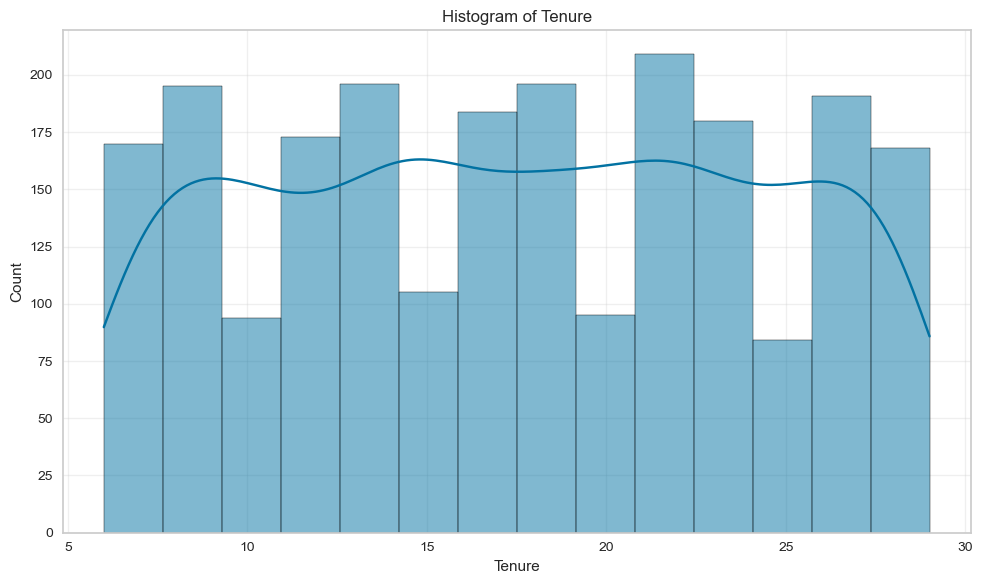

In [59]:
# Create histplot
plt.figure(figsize=(10, 6))
sns.histplot(x="Tenure", data=df, kde=True)
plt.grid(alpha=0.3)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [60]:
# Drop the redundant columns
# Z_CostContact and Z_Revenue have constant values throughout, it is better to drop these variables

df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df.head()

Education Marital_Status   Income Dt_Customer  Recency  Wines  Fruits  \
0  Graduation         Single  58138.0  2012-09-04       58    635      88   
1  Graduation         Single  46344.0  2014-03-08       38     11       1   
2  Graduation        Married  71613.0  2013-08-21       26    426      49   
3  Graduation        Married  26646.0  2014-02-10       26     11       4   
4         PhD        Married  58293.0  2014-01-19       94    173      43   

   Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   546   172      88    88                  3                8   
1     6     2       1     6                  2                1   
2   127   111      21    42                  1                8   
3    20    10       3     5                  2                2   
4   118    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Response  Age  Children  Family_Members  Spending  AcceptedCmpNo  \
0         1   57         0               1      1617              0   
1         0   60         2               3        27              0   
2         0   49         0               2       776              0   
3         0   30         1               3        53              0   
4         0   33         1               3       422              0   

   TotalDeal_Purchase  Tenure  
0                  25      28  
1                   6       9  
2                  21      16  
3                   8      10  
4                  19      11

In [61]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Children', 'Family_Members', 'Spending', 'AcceptedCmpNo',
       'TotalDeal_Purchase', 'Tenure'],
      dtype='object')

In [62]:
# New sequence of column names
new_column_sequence = ['Education', 'Marital_Status', 'Income','Age', 'Children', 'Family_Members', 'Recency','Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 
 'Gold','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','TotalDeal_Purchase','Spending', 
 'AcceptedCmpNo', 'Response', 'Complain', 'Tenure']

# Reassign DataFrame with the new column sequence
df = df[new_column_sequence]

## Correlation Analysis

Compute correlation coefficients (e.g., Pearson, Spearman) to quantify the relationship between numerical variables.

Visualize correlations using a heatmap.

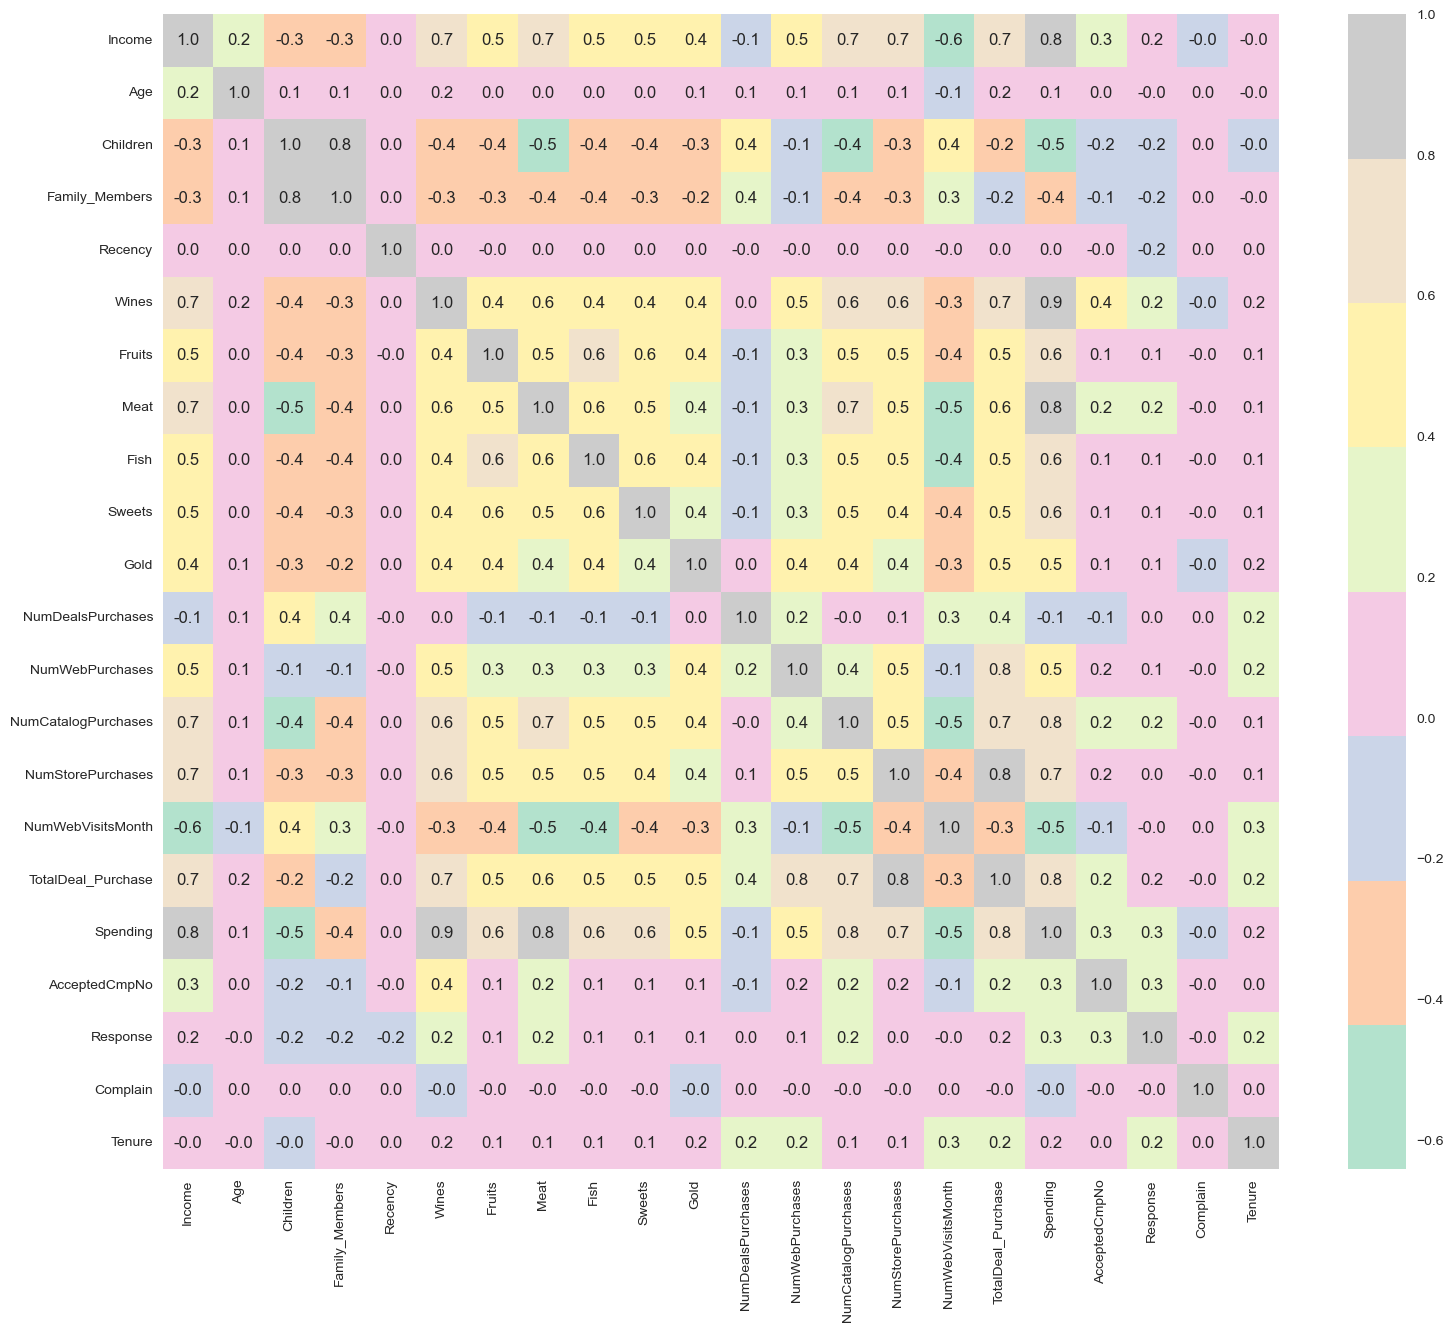

In [63]:
# Plot the correlation heatmap
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True,fmt = ".1f", cmap='Pastel2')
plt.show()

In [64]:
df.head()

Education Marital_Status   Income  Age  Children  Family_Members  Recency  \
0  Graduation         Single  58138.0   57         0               1       58   
1  Graduation         Single  46344.0   60         2               3       38   
2  Graduation        Married  71613.0   49         0               2       26   
3  Graduation        Married  26646.0   30         1               3       26   
4         PhD        Married  58293.0   33         1               3       94   

   Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  \
0    635      88   546   172      88    88                  3   
1     11       1     6     2       1     6                  2   
2    426      49   127   111      21    42                  1   
3     11       4    20    10       3     5                  2   
4    173      43   118    46      27    15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   TotalDeal_Purchase  Spending  AcceptedCmpNo  Response  Complain  Tenure  
0                  25      1617              0         1         0      28  
1                   6        27              0         0         0       9  
2                  21       776              0         0         0      16  
3                   8        53              0         0         0      10  
4                  19       422              0         0         0      11

# Data Enconding

In [65]:
le = LabelEncoder()
df['Education']= le.fit_transform(df['Education']) 
df['Marital_Status']= le.fit_transform(df['Marital_Status'])

df.head()

Education  Marital_Status   Income  Age  Children  Family_Members  Recency  \
0          0               1  58138.0   57         0               1       58   
1          0               1  46344.0   60         2               3       38   
2          0               0  71613.0   49         0               2       26   
3          0               0  26646.0   30         1               3       26   
4          2               0  58293.0   33         1               3       94   

   Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  \
0    635      88   546   172      88    88                  3   
1     11       1     6     2       1     6                  2   
2    426      49   127   111      21    42                  1   
3     11       4    20    10       3     5                  2   
4    173      43   118    46      27    15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   TotalDeal_Purchase  Spending  AcceptedCmpNo  Response  Complain  Tenure  
0                  25      1617              0         1         0      28  
1                   6        27              0         0         0       9  
2                  21       776              0         0         0      16  
3                   8        53              0         0         0      10  
4                  19       422              0         0         0      11

# Feature Scaling

In [66]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features in X using StandardScaler
df_scaled = scaler.fit_transform(df)

# Display the scaled features
df_scaled

array([[-0.80958911,  1.34687429,  0.31573713, ...,  2.38884634,
        -0.09728167,  1.56049967],
       [-0.80958911,  1.34687429, -0.25782666, ..., -0.41861211,
        -0.09728167, -1.2560765 ],
       [-0.80958911, -0.74245979,  0.97105103, ..., -0.41861211,
        -0.09728167, -0.21839054],
       ...,
       [-0.80958911,  1.34687429,  0.25947011, ..., -0.41861211,
        -0.09728167, -0.95959479],
       [-0.02656683, -0.74245979,  0.85589086, ..., -0.41861211,
        -0.09728167, -0.95959479],
       [ 0.75645546, -0.74245979,  0.05949603, ...,  2.38884634,
        -0.09728167,  1.26401797]])

# Dimensionality Reduction (PCA)

In [67]:
# Initialize PCA 
pca = PCA(n_components=None)

# Fit PCA to the scaled features df_scaled and transform them to the principal components
principal_components = pca.fit_transform(df_scaled)

In [68]:
# Get the explained variance of the principal components
pca.explained_variance_

array([8.11005666e+00, 2.41921019e+00, 1.61829801e+00, 1.26143140e+00,
       1.15500978e+00, 1.03740979e+00, 1.01542761e+00, 1.00105144e+00,
       8.50625236e-01, 7.93027440e-01, 7.37560988e-01, 6.32224504e-01,
       5.75045245e-01, 5.34900933e-01, 4.42297228e-01, 4.40590203e-01,
       3.90896364e-01, 3.38617004e-01, 2.72777896e-01, 2.37746860e-01,
       1.46514295e-01, 1.29161103e-31, 4.28587074e-32, 3.40167779e-32])

In [69]:
# Get the explained variance ratio of the principal components
pca.explained_variance_ratio_

array([3.37768171e-01, 1.00755424e-01, 6.73989814e-02, 5.25361775e-02,
       4.81039231e-02, 4.32061107e-02, 4.22905957e-02, 4.16918558e-02,
       3.54268955e-02, 3.30280587e-02, 3.07179883e-02, 2.63309276e-02,
       2.39495220e-02, 2.22775891e-02, 1.84208239e-02, 1.83497296e-02,
       1.62800774e-02, 1.41027431e-02, 1.13606717e-02, 9.90169681e-03,
       6.10203696e-03, 5.37931009e-33, 1.78498225e-33, 1.41673299e-33])

In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33776817, 0.43852359, 0.50592258, 0.55845875, 0.60656268,
       0.64976879, 0.69205938, 0.73375124, 0.76917813, 0.80220619,
       0.83292418, 0.85925511, 0.88320463, 0.90548222, 0.92390304,
       0.94225277, 0.95853285, 0.97263559, 0.98399627, 0.99389796,
       1.        , 1.        , 1.        , 1.        ])

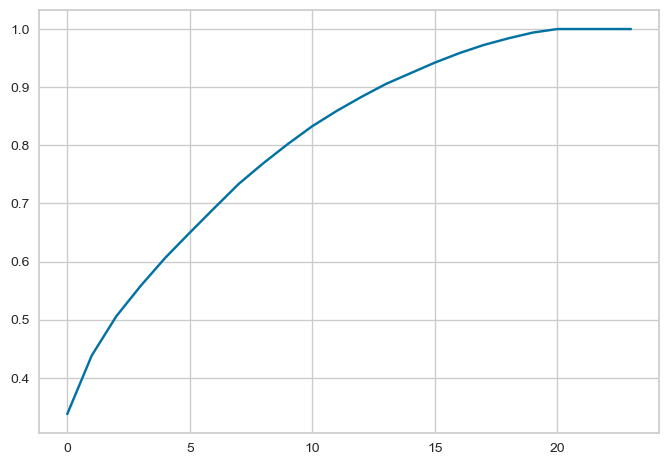

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)

- Here we get 90% + variance explained with 13 pc components.

In [72]:
# Initialize PCA with 13 principal components
pca = PCA(n_components=13)

# Fit PCA to the scaled features df_scaled and transform them to the principal components
principal_components = pca.fit_transform(df_scaled)

In [73]:
# Get the explained variance of the principal components
pca.explained_variance_

array([8.11005666, 2.41921019, 1.61829801, 1.2614314 , 1.15500978,
       1.03740979, 1.01542761, 1.00105144, 0.85062524, 0.79302744,
       0.73756099, 0.6322245 , 0.57504525])

In [74]:
# Get the explained variance ratio of the principal components
pca.explained_variance_ratio_

array([0.33776817, 0.10075542, 0.06739898, 0.05253618, 0.04810392,
       0.04320611, 0.0422906 , 0.04169186, 0.0354269 , 0.03302806,
       0.03071799, 0.02633093, 0.02394952])

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33776817, 0.43852359, 0.50592258, 0.55845875, 0.60656268,
       0.64976879, 0.69205938, 0.73375124, 0.76917813, 0.80220619,
       0.83292418, 0.85925511, 0.88320463])

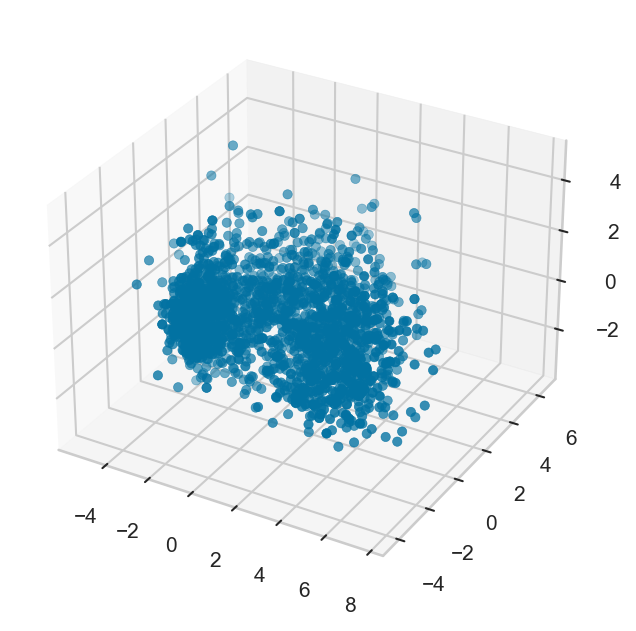

In [76]:
# Plot the 3D scatter plot of the principal components
plt.figure(figsize=(5,5),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(principal_components[:,0],principal_components[:,1],principal_components[:,2]);

In [77]:
# Create DataFrame with principal components and cluster labels
df_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'PC3': principal_components[:, 2],
    # 'Cluster': cluster_labels
})

In [78]:
# Create the 3D scatter plot using the DataFrame
# fig = px.scatter_3d(df_data, x='PC1', y='PC2', z='PC3', color='Cluster')
fig = px.scatter_3d(df_data, x='PC1', y='PC2', z='PC3')

# Update layout and show the plot
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

# K-Means Clustering

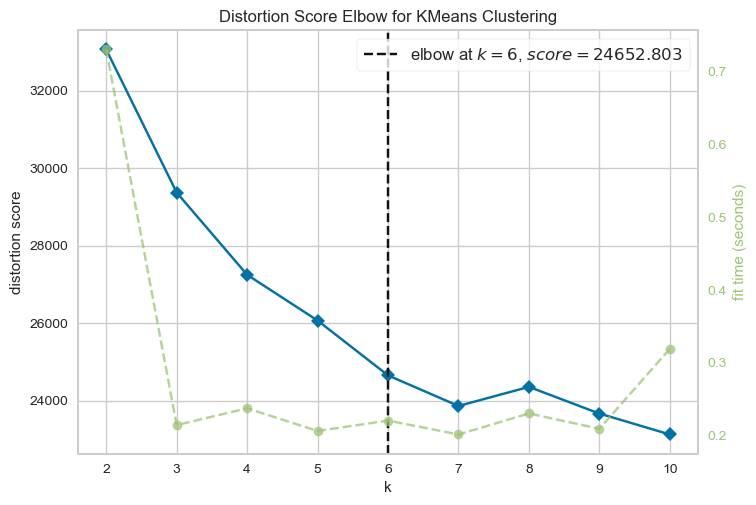

In [79]:
kmeans = KMeans(random_state=42)
elbow_method = KElbowVisualizer(kmeans)
elbow_method.fit(principal_components)
elbow_method.show()
plt.show()

In [80]:
# Define a range of k values to explore
k_range = range(2, 11)  # Adjust the range as needed

# Create a list to store Silhouette Scores and SSD for each k
silhouette_scores_list = []
ssd = []

# Calculate and store Silhouette Scores for each k value in the range
for k in k_range:
    # Perform K-Means clustering with the current k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)

    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_

    # Calculate Silhouette Score for the current k
    silhouette_score_value = silhouette_score(principal_components, cluster_labels)

    # Append the Silhouette Score and SSD for this k
    silhouette_scores_list.append(silhouette_score_value)
    ssd.append(kmeans.inertia_)

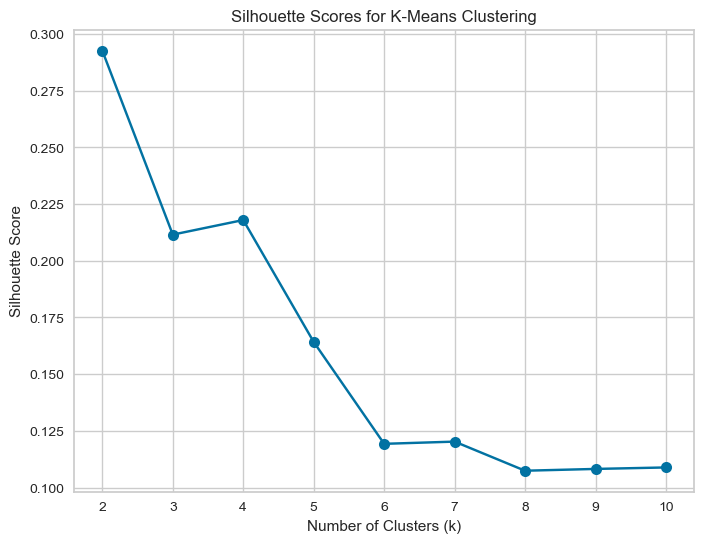

In [81]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores_list, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.grid(True)
plt.show()

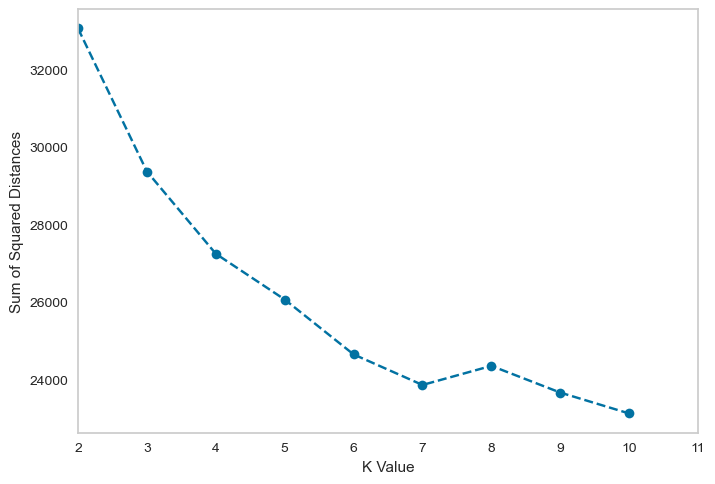

In [82]:
# Assuming ssd contains more than 9 values
k_values = range(2, 11)  # x-axis values (k values)
ssd_subset = ssd[:len(k_values)]  # Shorten ssd to match k_values length

plt.plot(k_values, ssd_subset, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')
plt.xlim(2, 11)
plt.grid()

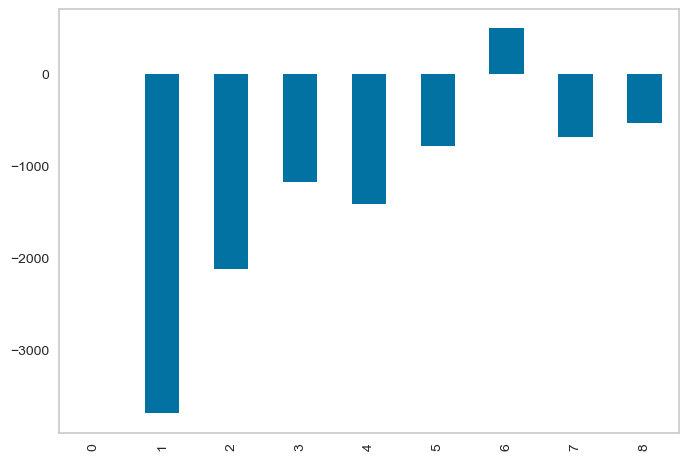

In [83]:
# Plot the Sum of Squared Distances (SSD) against different values of k
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

- The point where the rate of decrease in SSD slows down significantly is often considered the optimal number of clusters.
- Here we are getting 4 as a minimum SSD hence we'll keep number of clusters is 4.

In [84]:
# Display the silhouette scores
silhouette_scores_list

[0.2926180995238292,
 0.21152871171789206,
 0.21796088953644663,
 0.16420703352038823,
 0.11927695966168232,
 0.12025334035485333,
 0.10741773578926044,
 0.1082080853978864,
 0.10886265349591033]

In [85]:
# Display the cluster labels assigned by KMeans
kmeans.labels_

array([5, 2, 3, ..., 9, 3, 2])

# K Means

In [86]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

In [87]:
# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

In [88]:
df.head()

Education  Marital_Status   Income  Age  Children  Family_Members  Recency  \
0          0               1  58138.0   57         0               1       58   
1          0               1  46344.0   60         2               3       38   
2          0               0  71613.0   49         0               2       26   
3          0               0  26646.0   30         1               3       26   
4          2               0  58293.0   33         1               3       94   

   Wines  Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  \
0    635      88   546   172      88    88                  3   
1     11       1     6     2       1     6                  2   
2    426      49   127   111      21    42                  1   
3     11       4    20    10       3     5                  2   
4    173      43   118    46      27    15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   TotalDeal_Purchase  Spending  AcceptedCmpNo  Response  Complain  Tenure  \
0                  25      1617              0         1         0      28   
1                   6        27              0         0         0       9   
2                  21       776              0         0         0      16   
3                   8        53              0         0         0      10   
4                  19       422              0         0         0      11   

   Cluster  
0        1  
1        0  
2        1  
3        0  
4        2

# Classification Models

## Data Splitting

In [89]:
# Prepare data for classification (using all columns)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [90]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1792, 24)
Shape of X_test:  (448, 24)
Shape of y_train:  (1792,)
Shape of y_test: (448,)


## Feature Scaling

In [92]:
scaler = StandardScaler()

In [93]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## KNN

In [94]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [95]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [96]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [97]:
y_pred = knn.predict(scaled_X_test)

In [98]:
y_pred

array([2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 3, 2, 2,
       0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2,

## KNN Model Evaluation

Accuracy: 0.9352678571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.99      0.95      0.97       119
           2       0.93      0.86      0.90       145
           3       1.00      1.00      1.00         1

    accuracy                           0.94       448
   macro avg       0.96      0.95      0.95       448
weighted avg       0.94      0.94      0.93       448



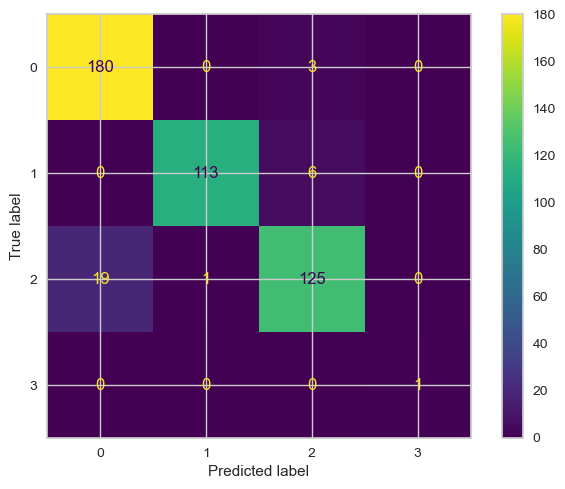

In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## KNN Hyperparameter Tuning

In [100]:
# Define values of k for KNeighborsClassifier
k_values = list(range(1, 15))

# Define parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# Create GridSearchCV instance for cross-validation
knn_grid = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the classifier
knn_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

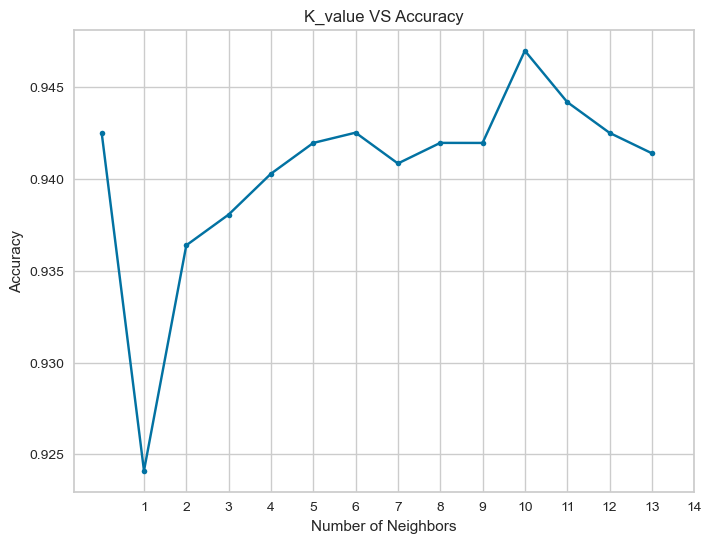

In [101]:
plt.figure(figsize=[8,6])
plt.plot(pd.DataFrame(knn_grid.cv_results_)['mean_test_score'], marker='o', markersize=4)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('K_value VS Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show();

- The peak of the curve is around K=5.
- This suggests that using 5 neighbors as the K value would likely result in the highest accuracy for this specific dataset.

In [102]:
# Get the best estimator from GridSearchCV
best_estimator = knn_grid.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



## Model Evaluation

Accuracy: 0.265625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.27      1.00      0.42       119
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00         1

    accuracy                           0.27       448
   macro avg       0.07      0.25      0.10       448
weighted avg       0.07      0.27      0.11       448



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



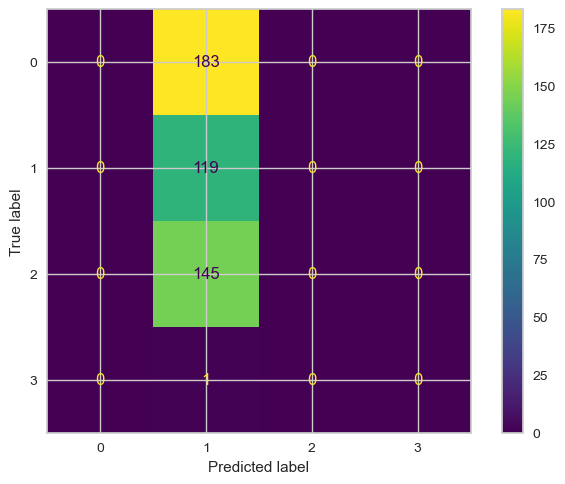

In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# SVC

In [104]:
# Initialize and train the SVC model
svc = SVC(kernel='linear', random_state=42)

# Fit the basic SVC
svc.fit(scaled_X_train, y_train)

SVC(kernel='linear', random_state=42)

In [105]:
# Evaluate the basic SVC
y_pred_svc = svc.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SVC was fitted without feature names



## SVC Model Evaluation

Accuracy: 0.265625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.27      1.00      0.42       119
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00         1

    accuracy                           0.27       448
   macro avg       0.07      0.25      0.10       448
weighted avg       0.07      0.27      0.11       448



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



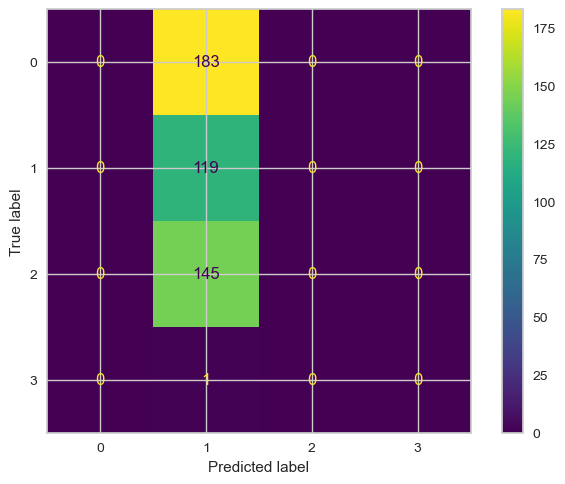

In [106]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

## SVC HyperParameter Tuning

In [107]:
# Define an instance of SVC
svc = SVC()

# Define a parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

# Get the best estimator from GridSearchCV
best_estimator = grid_search.best_estimator_

# Now, you can access the best_estimator attributes
best_params = best_estimator.get_params()

In [108]:
# Evaluate the tuned model
y_pred_tuned = best_estimator.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SVC was fitted without feature names



#### My changes

In [120]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [117]:
X_train_no_names = X_train.values if hasattr(X_train, 'values') else X_train
X_test_no_names = X_test.values if hasattr(X_test, 'values') else X_test

In [118]:
# Initialize and fit SVC model
svc_model = SVC()
svc_model.fit(X_train_no_names, y_train)

SVC()

In [124]:
best_model = grid_search.best_estimator_

In [125]:
best_model.fit(scaled_X_train, y_train)

SVC(C=10, kernel='linear')

In [126]:
# Predict the labels for the scaled test set using the best model
y_pred_svc_new = best_model.predict(scaled_X_test)

In [127]:
accuracy = accuracy_score(y_test, y_pred_svc_new)
print("Accuracy:", accuracy)

Accuracy: 0.9910714285714286


## Model Evaluation

Accuracy: 0.265625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.27      1.00      0.42       119
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00         1

    accuracy                           0.27       448
   macro avg       0.07      0.25      0.10       448
weighted avg       0.07      0.27      0.11       448



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



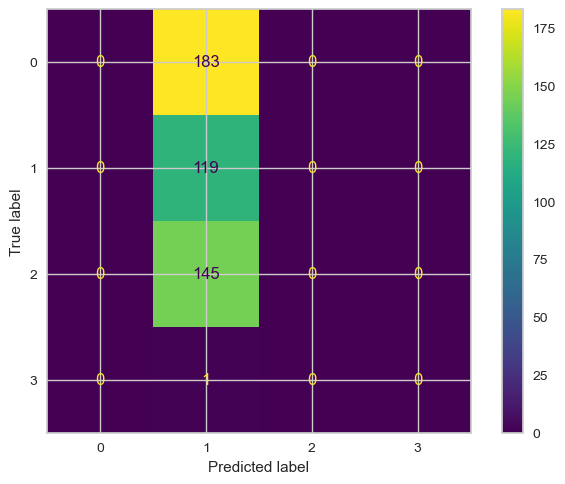

In [109]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tuned))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Random Forest Classifier

In [110]:
rfc_model = RandomForestClassifier()

In [111]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
y_pred = rfc_model.predict(X_test)
y_pred

array([2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 3, 2, 2,
       0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2,

## Model Evaluation

Accuracy: 0.9575892857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       183
           1       0.94      0.97      0.95       119
           2       0.96      0.92      0.94       145
           3       1.00      1.00      1.00         1

    accuracy                           0.96       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.96      0.96      0.96       448



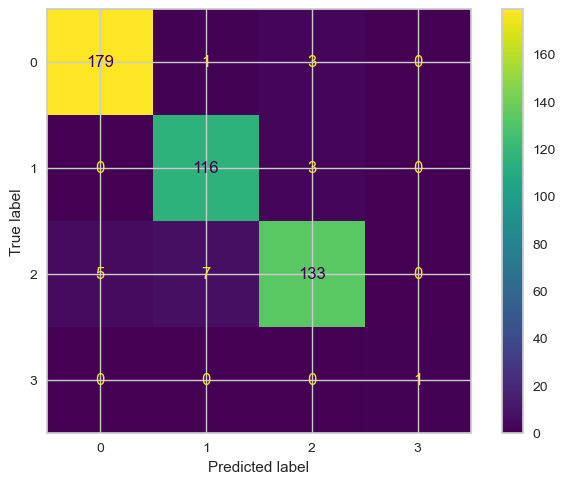

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Important Attribute

In [114]:
imp_feature = rfc_model.feature_importances_

# Get indices to sort feature importances in descending order
sorted_indices = np.argsort(imp_feature)[::-1]

# Sort feature importances and feature names accordingly
sorted_imp_feature = imp_feature[sorted_indices]
sorted_columns = X.columns[sorted_indices]

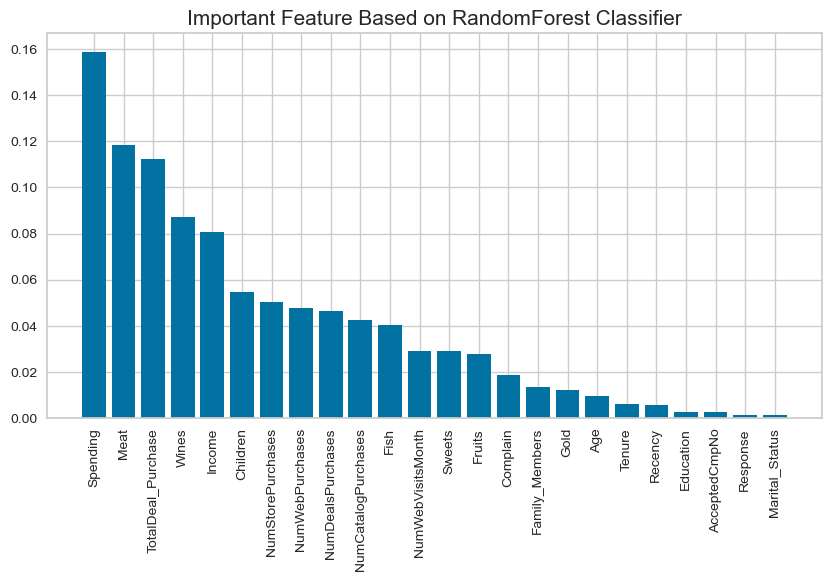

In [115]:
# Plot the sorted feature importances
plt.figure(figsize=(10,5))
plt.bar(x=sorted_columns, height=sorted_imp_feature)
plt.title('Important Feature Based on RandomForest Classifier', size=15)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## HyperParameter Tuning

In [116]:
rfc = RandomForestClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3],
              'max_features': ['sqrt', 0.5]}

rfc_grid = GridSearchCV(rfc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [126]:
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [127]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

In [128]:
y_pred = rfc_grid.predict(X_test)
y_pred

array([1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 3, 1, 0, 1, 1, 2,
       2, 0, 2, 3, 3, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 3, 1, 2, 2, 2, 3,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 3, 3, 3, 0, 3, 1, 3, 2, 2, 2, 2, 0, 3, 3, 2, 2, 2, 1, 1, 0, 3,
       1, 3, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 3, 1,
       0, 2, 1, 0, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 3, 1, 1, 1, 0, 2, 3, 1, 1, 2, 3, 1, 0, 3, 3,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 3, 1, 2, 2, 1, 0, 1, 1, 3, 1,
       2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 2, 1, 0, 1, 3, 0, 1, 3,
       1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 1, 1,
       3, 0, 2, 2, 1, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 2, 2, 1, 0, 1, 3, 3,
       1, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 0, 2, 1, 1, 0, 3, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 3, 2, 2, 1, 0, 1,

## Model Evaluation

Accuracy: 0.9419642857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       127
           1       0.88      0.96      0.92       120
           2       0.99      0.98      0.99       114
           3       0.95      0.87      0.91        87

    accuracy                           0.94       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.94      0.94      0.94       448



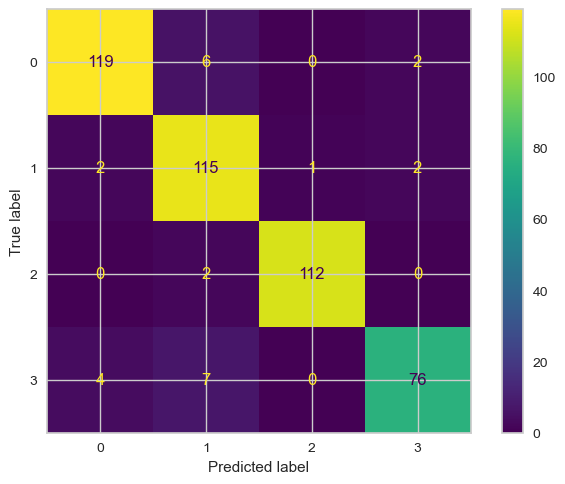

In [129]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))